# Simulating monetary incentive delay runs
How do we get to "under 50 bucks" and stabilize totals as much as we can?

First, here's code to simulate task runs:

In [3]:
import random
import matplotlib.pyplot as plt

num_runs = 3
# Trials per run
num_trials = 30

possible_trials = [
    'neutral',
    'neutral',
    'neutral',
    'neutral',
    'neutral',
    'neutral',
    'neutral',
    'neutral',
    'neutral',
    'neutral',
    'reward.high',
    'reward.high',
    'reward.high',
    'reward.high',
    'reward.high',
    'reward.low',
    'reward.low',
    'reward.low',
    'reward.low',
    'reward.low',
    'loss.high',
    'loss.high',
    'loss.high',
    'loss.high',
    'loss.high',
    'loss.low',
    'loss.low',
    'loss.low',
    'loss.low',
    'loss.low',
]


# Reward within a range, with option to attempt to nudge rewards in a direction
def reward_for_range(r, total_earnings, total_earnings_goal, nudge=False):
    if not nudge:
        items = list(range(r[0], r[1]+1))
        return random.choice(items)
    else:
        def distance_to_goal(x):
            return abs(total_earnings + x - total_earnings_goal)

        d0 = distance_to_goal(r[0])
        d1 = distance_to_goal(r[1])
        #print(f"{total_earnings} with rewards {r[0]} and {r[1]} distances {d0} and {d1}")

        if d0 < d1:
            return r[0]
        else:
            return r[1]


def simulate_task(success_rate, rewards, total_earnings_goal, nudge_run=4):
    total = 0
    for run in range(1, num_runs+1):
        trials = list(possible_trials)
        random.shuffle(trials)

        for trial_type in trials:
            reward = 0
            nudge_rewards = run >= nudge_run

            # fake a participant response at our specified rate
            trial_response = random.random() < success_rate

            if trial_type == 'reward.high' or trial_type == 'reward.low':
                if trial_response:
                    reward = reward_for_range(rewards[trial_type], total, total_earnings_goal, nudge_rewards)
            elif trial_type == 'loss.high' or trial_type == 'loss.low':
                if not trial_response:
                    reward = reward_for_range(rewards[trial_type], total, total_earnings_goal, nudge_rewards)

            total += reward

    return total

## Some possible rewards
"Stable" rewards are what we have been using.

I added the possibility of picking randomly from a range.

I also added the idea of "nudging" after a run #, which picks the result in the range that will keep us closest to our "goal value".

So here are some increasingly overlapping ranges for possible values, including one that overlaps at $4 and one that SUPER overlaps, as well as one that has the option of ZERO reward/loss for low valences.

In [4]:
stable_rewards = {
        "reward.high": (7,7),
        "reward.low": (1,1),
        "loss.high": (-7,-7),
        "loss.low": (-1,-1),
    }

stable_rewards_narrow = {
        "reward.high": (6,6),
        "reward.low": (2,2),
        "loss.high": (-6,-6),
        "loss.low": (-2,-2),
    }

range_rewards_1 = {
        "reward.high": (3,7),
        "reward.low": (1,3),
        "loss.high": (-7,-3),
        "loss.low": (-3,-1),
    }

range_rewards_2 = {
        "reward.high": (4,7),
        "reward.low": (1,4),
        "loss.high": (-7,-4),
        "loss.low": (-4,-1),
    }

range_rewards_3 = {
        "reward.high": (3,7),
        "reward.low": (1,5),
        "loss.high": (-7,-3),
        "loss.low": (-5,-1),
    }

range_rewards_zero = {
        "reward.high": (4,7),
        "reward.low": (0,2),
        "loss.high": (-7,-4),
        "loss.low": (-2,0),
    }

In [5]:
# Simulate a single run
simulate_task(0.66, range_rewards_1, 40, nudge_run=3)

41

# Fake a whole bunch of data and then look at it!

Keep in mind that this section assumes a staircase success, where we hit a response rate of 66%.

In [20]:
rate = 0.66
goal = 40
stable = [simulate_task(rate, stable_rewards, goal) for i in range(0, 100000)]
stable_narrow = [simulate_task(rate, stable_rewards_narrow, goal) for i in range(0, 100000)]
ranged = [simulate_task(rate, range_rewards_1, goal) for i in range(0, 50000)]
nudged1 = [simulate_task(rate, range_rewards_1, goal, nudge_run=3) for i in range(0, 100000)]
nudged2 = [simulate_task(rate, range_rewards_2, goal, nudge_run=3) for i in range(0, 50000)]
nudged3 = [simulate_task(rate, range_rewards_2, goal, nudge_run=3) for i in range(0, 50000)]
nudged_zero = [simulate_task(rate, range_rewards_zero, goal, nudge_run=3) for i in range(0, 50000)]

In [21]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 12, 8
def plot_hist(thing, title=""):
    bins = 30
    plt.hist(thing, bins)
    plt.title(title)

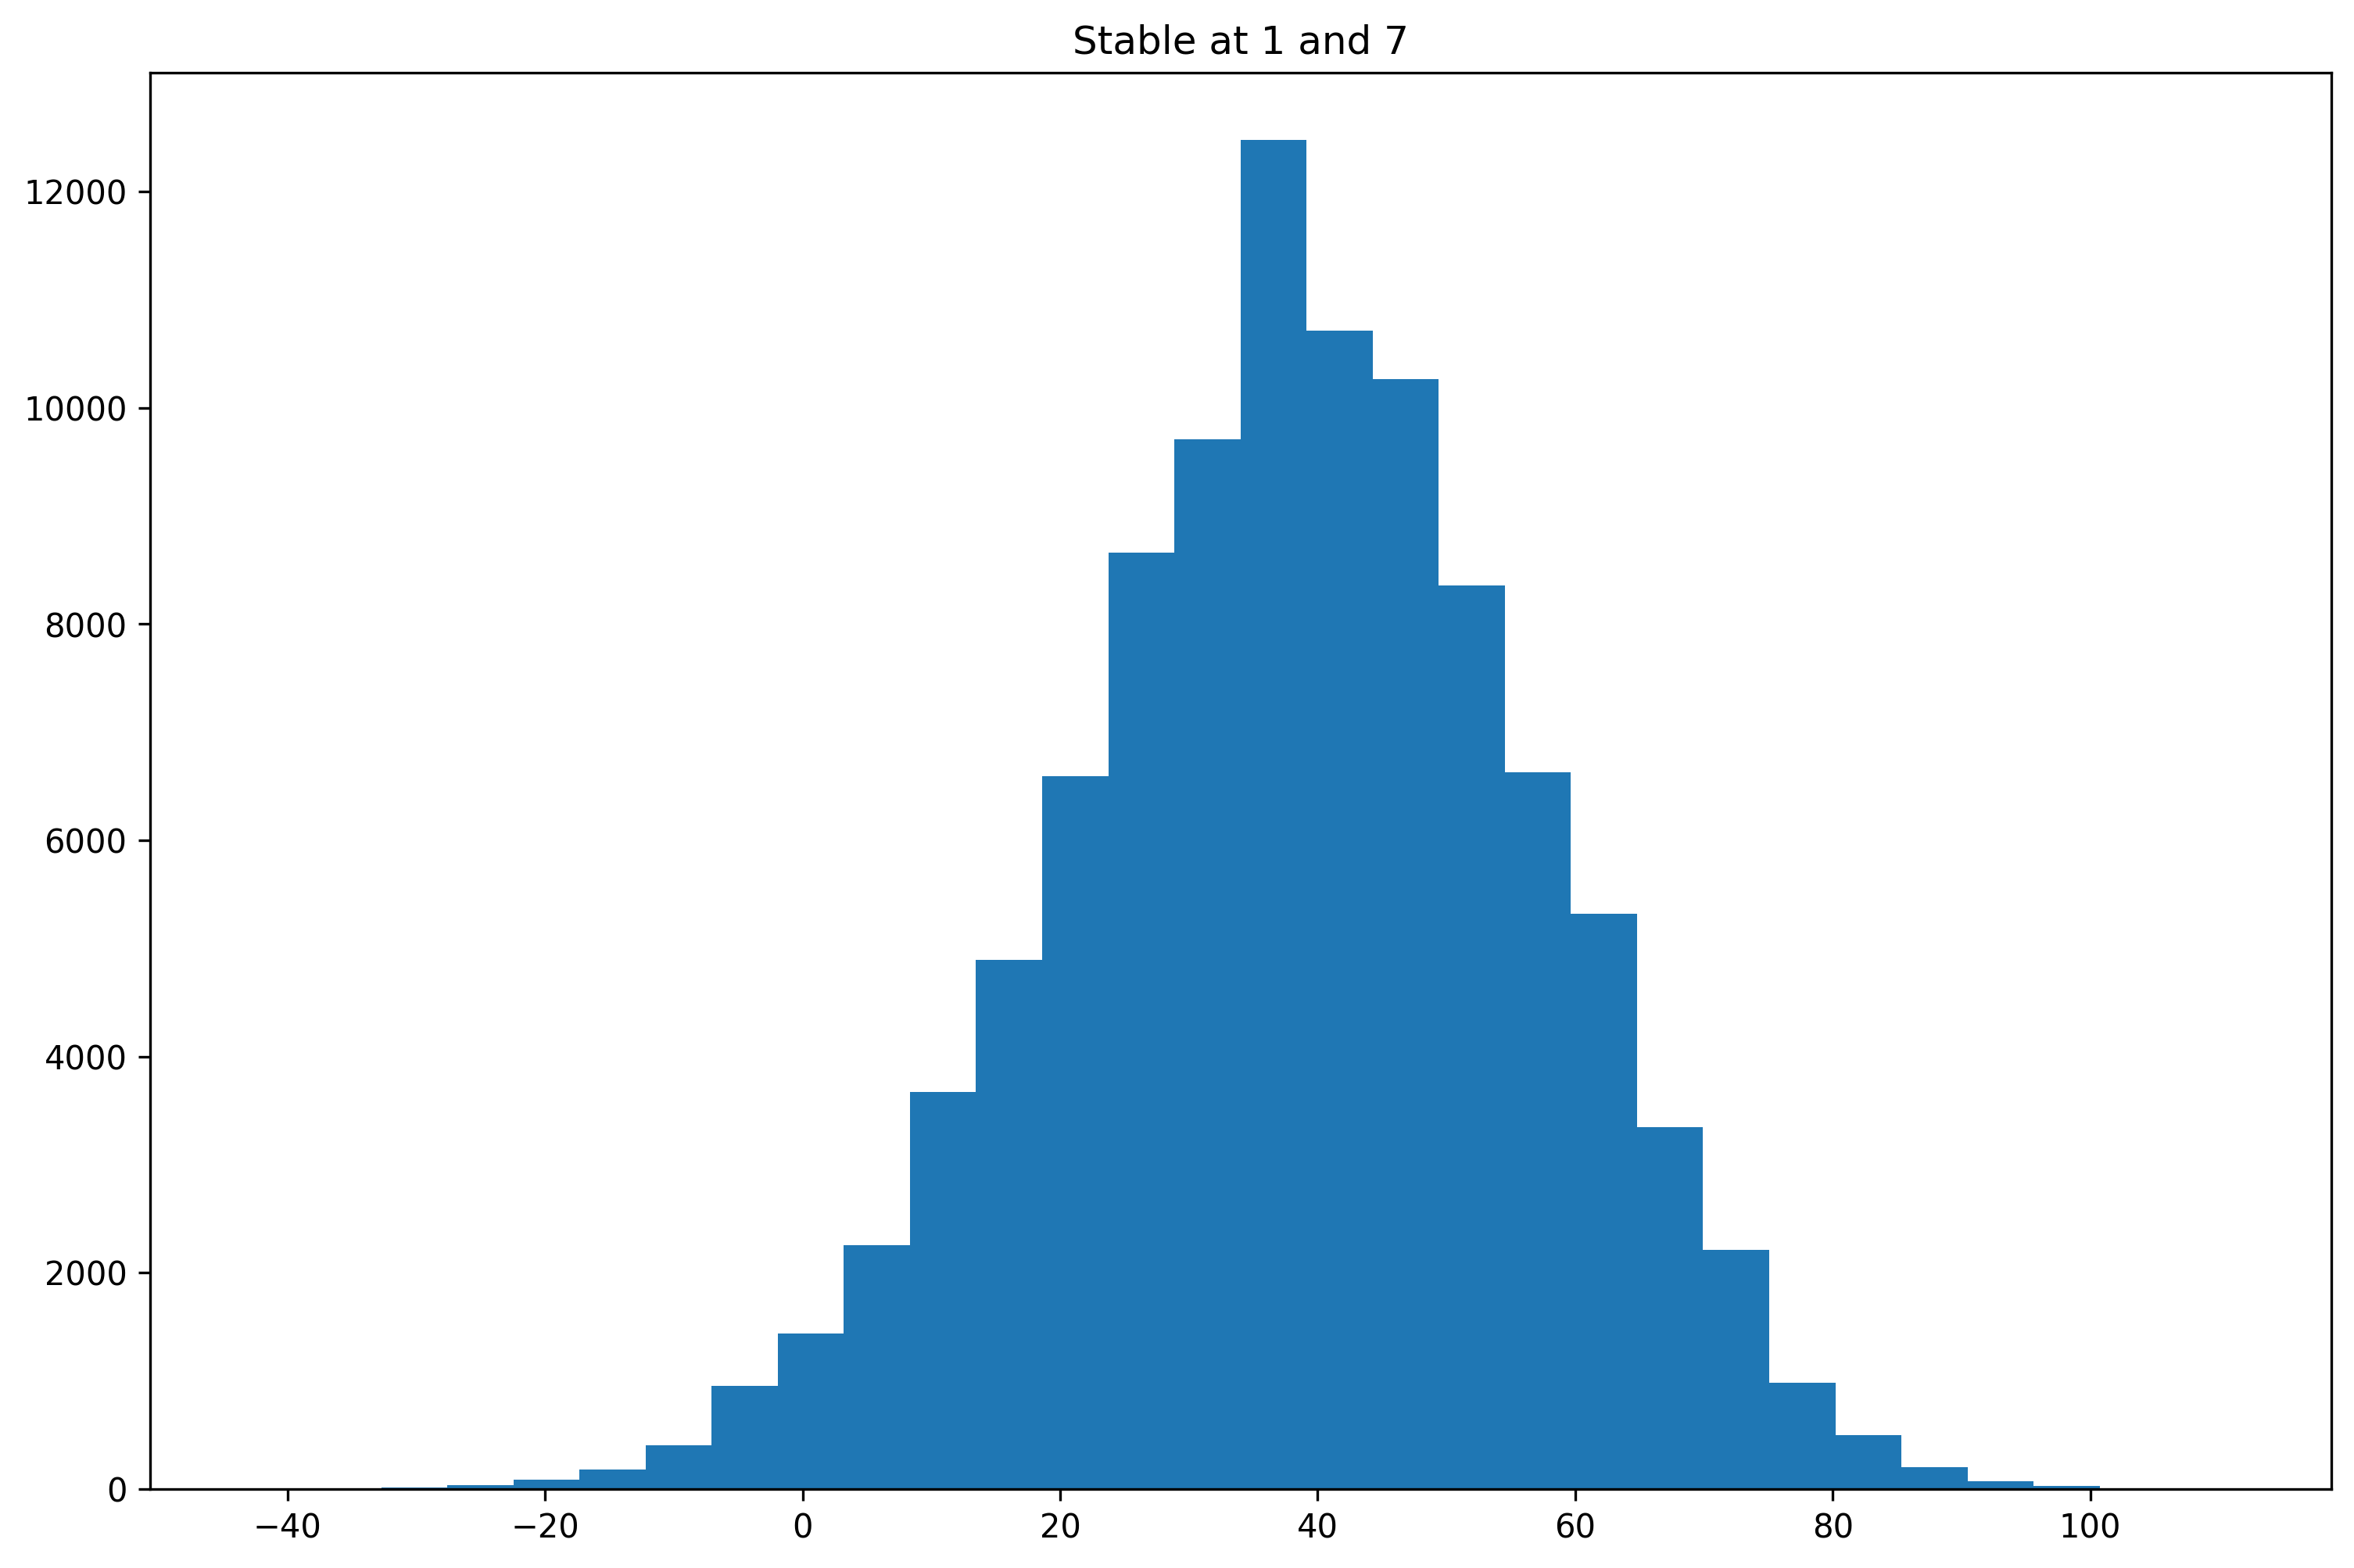

In [22]:
plot_hist(stable, r'Stable at 1 and 7')

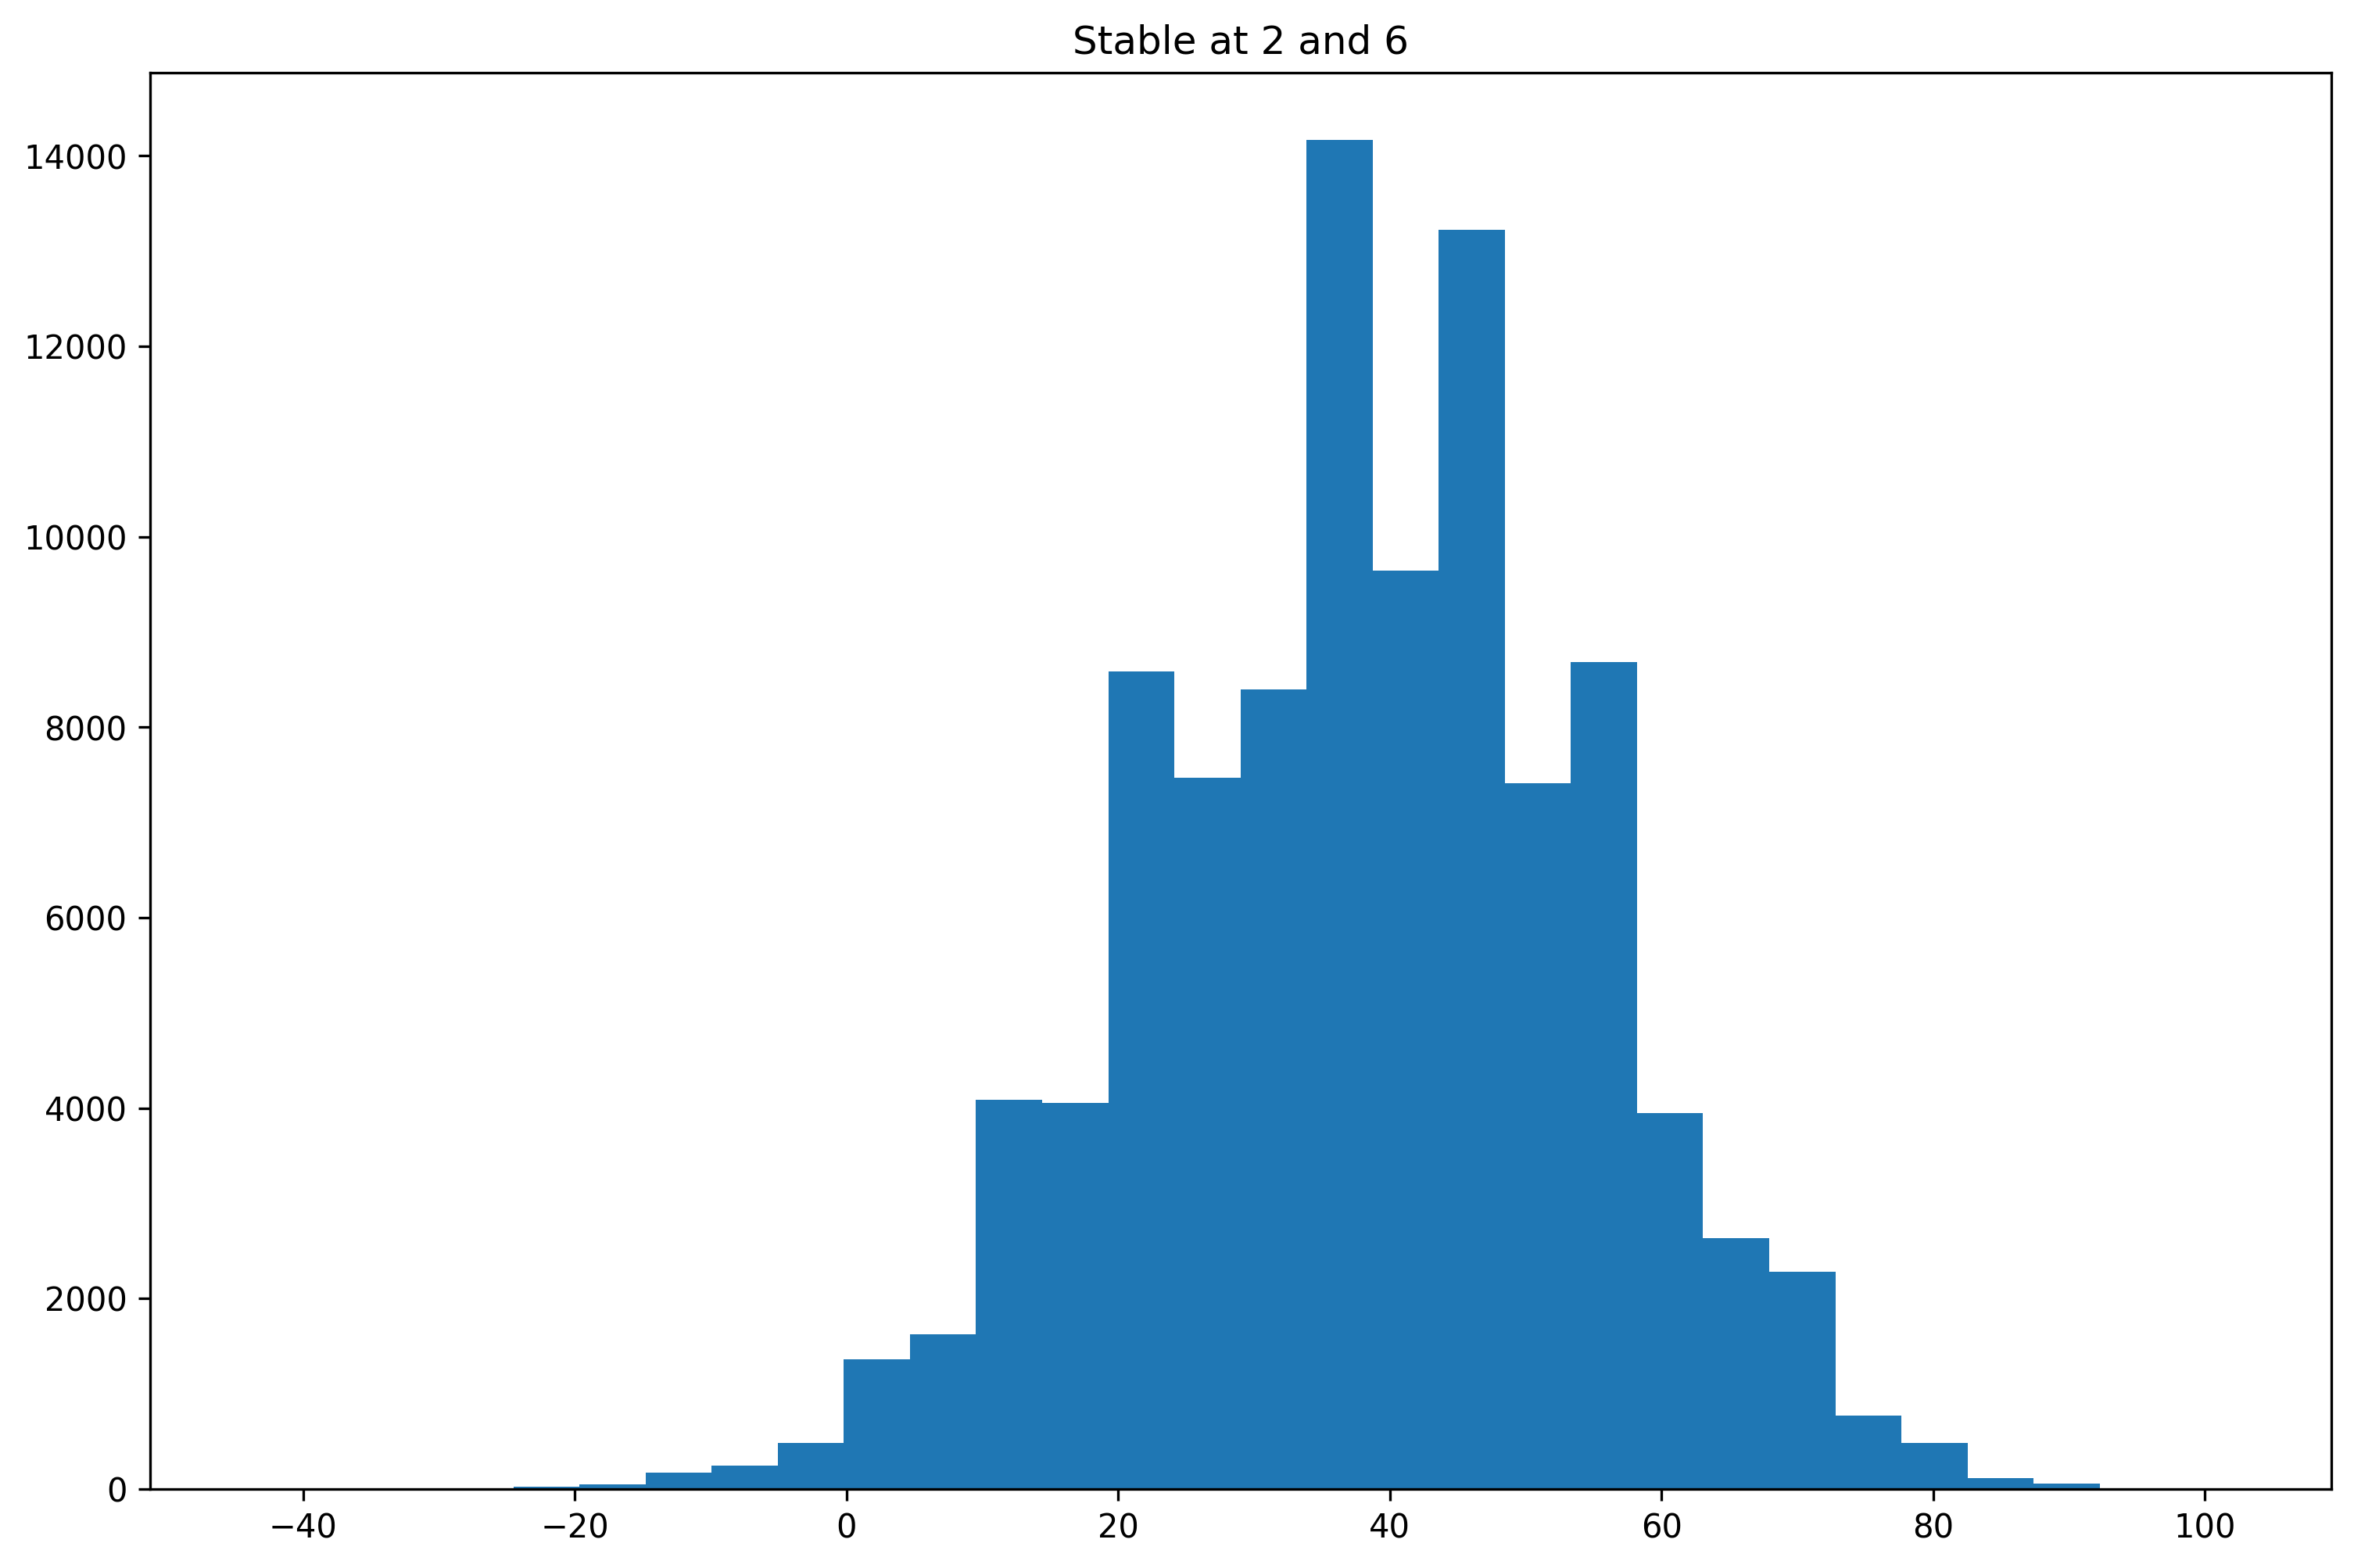

In [23]:
plot_hist(stable_narrow, r'Stable at 2 and 6')

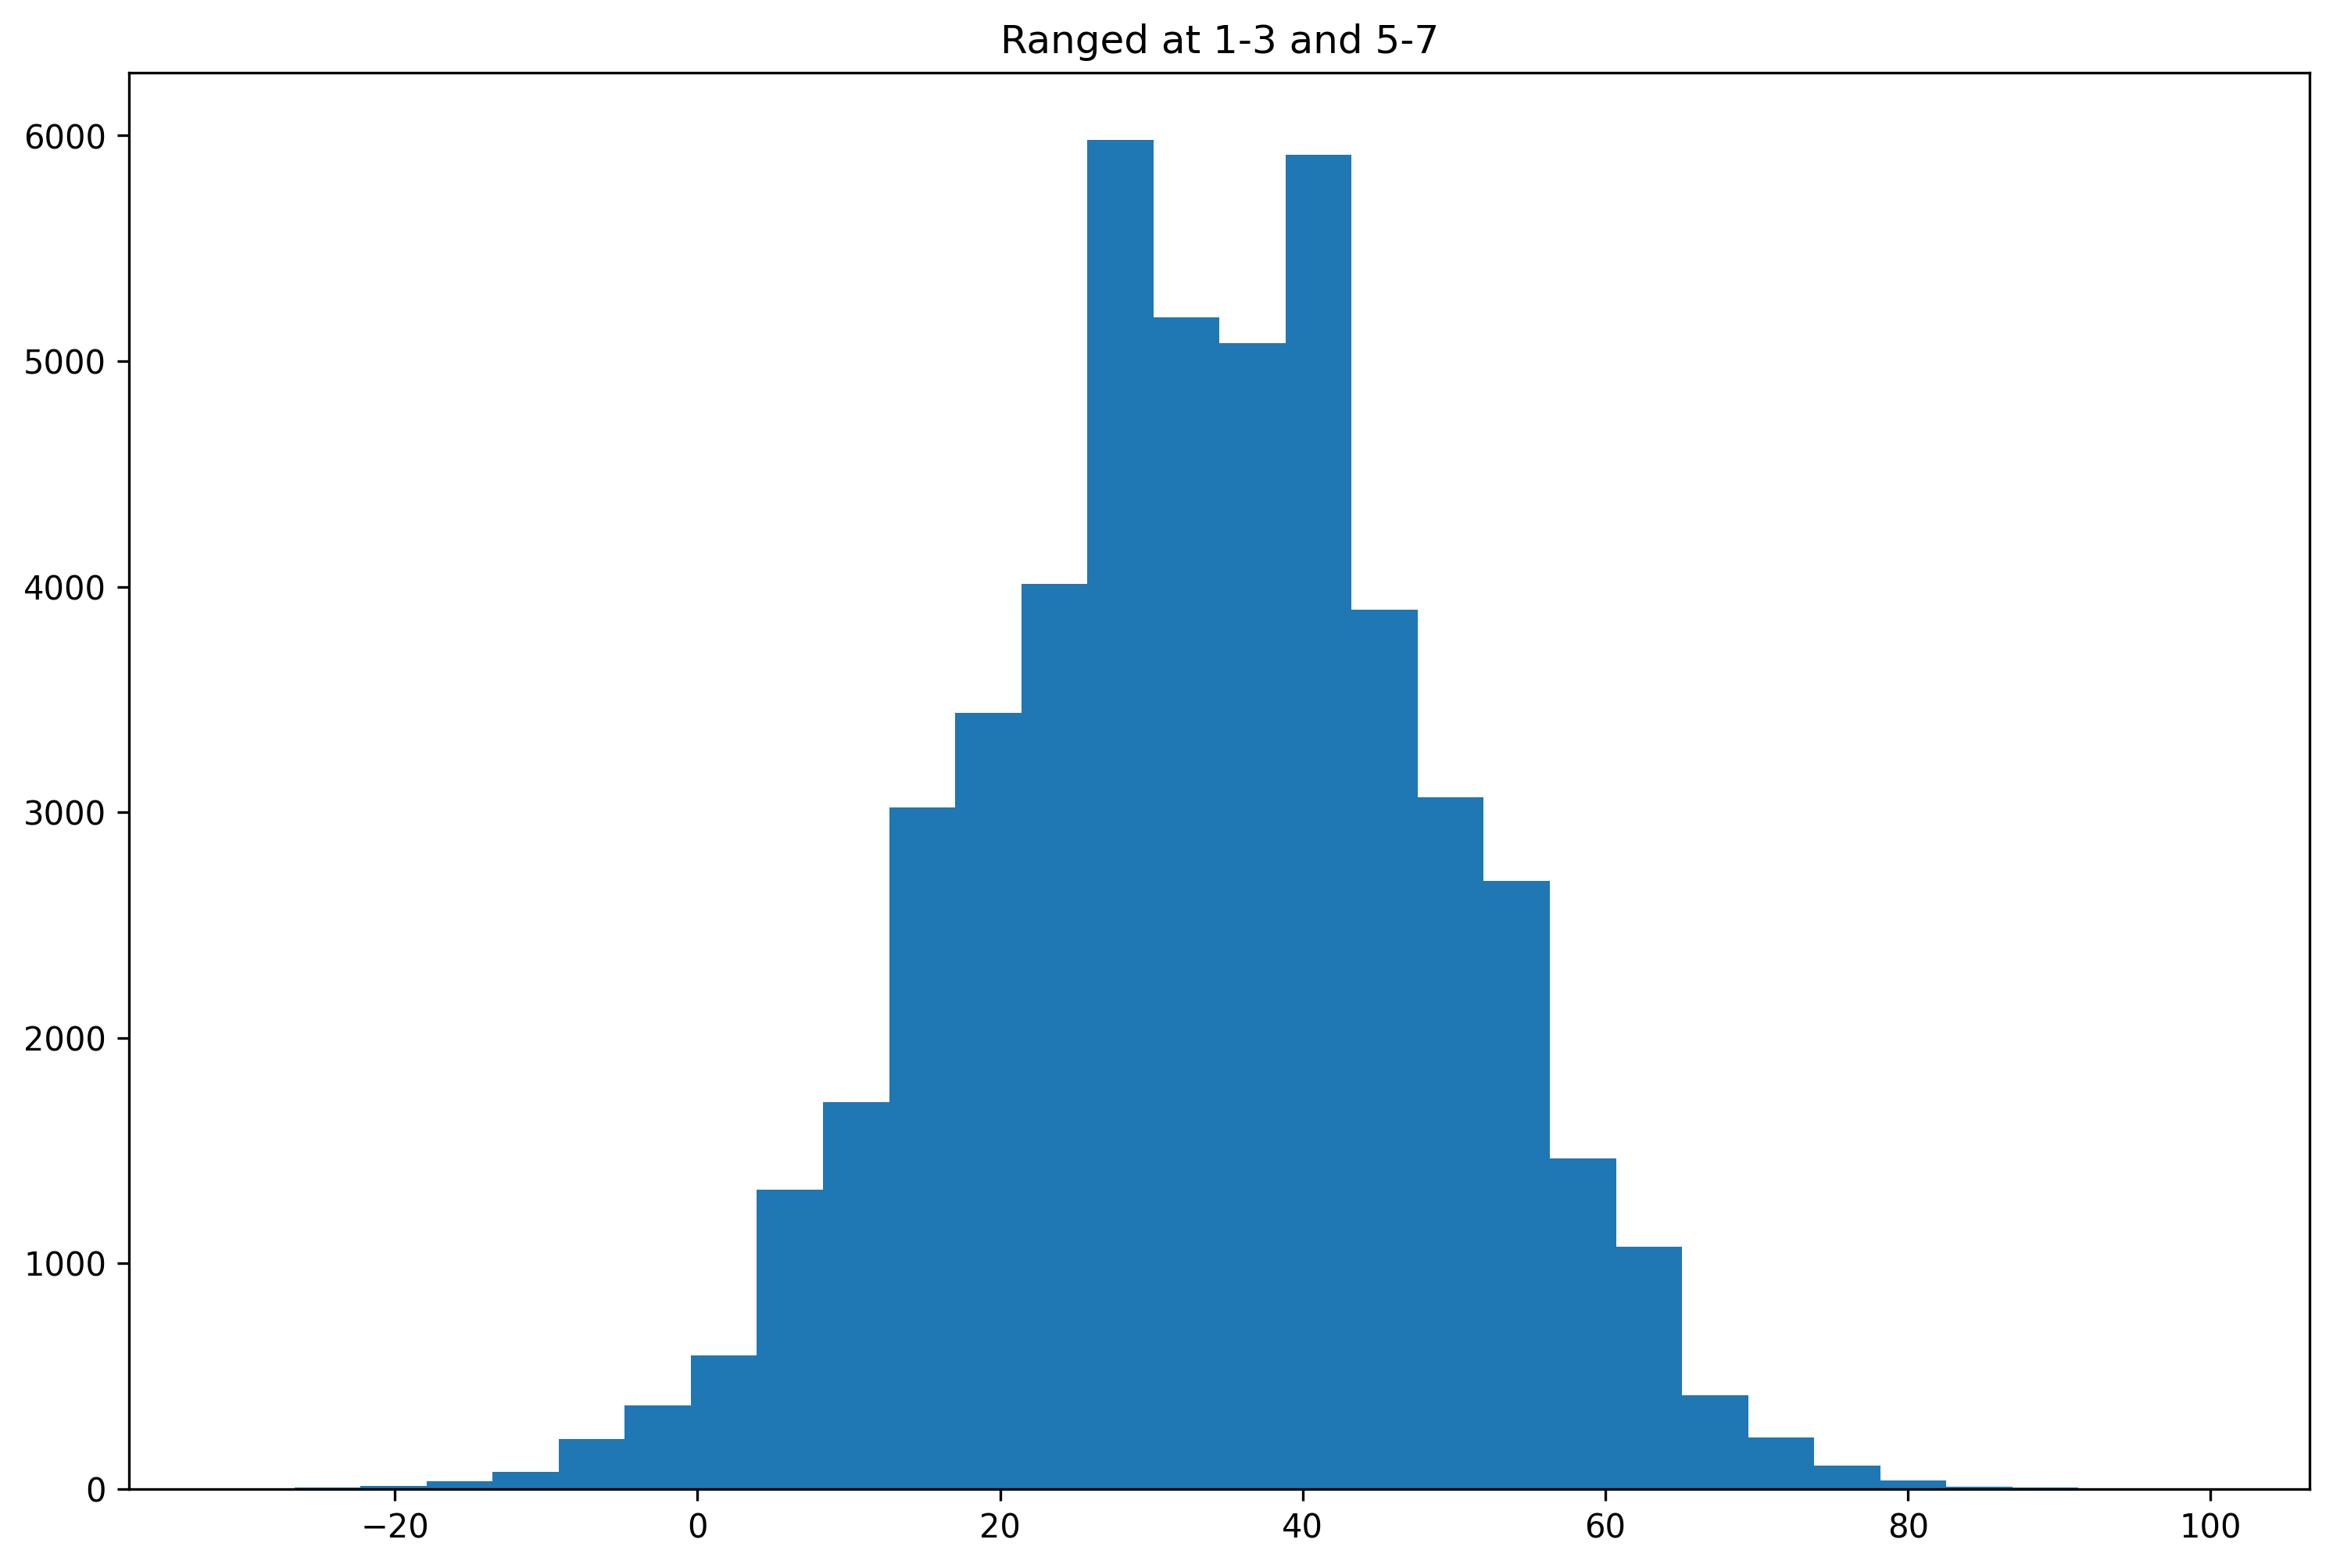

In [24]:
plot_hist(ranged, r'Ranged at 1-3 and 5-7')

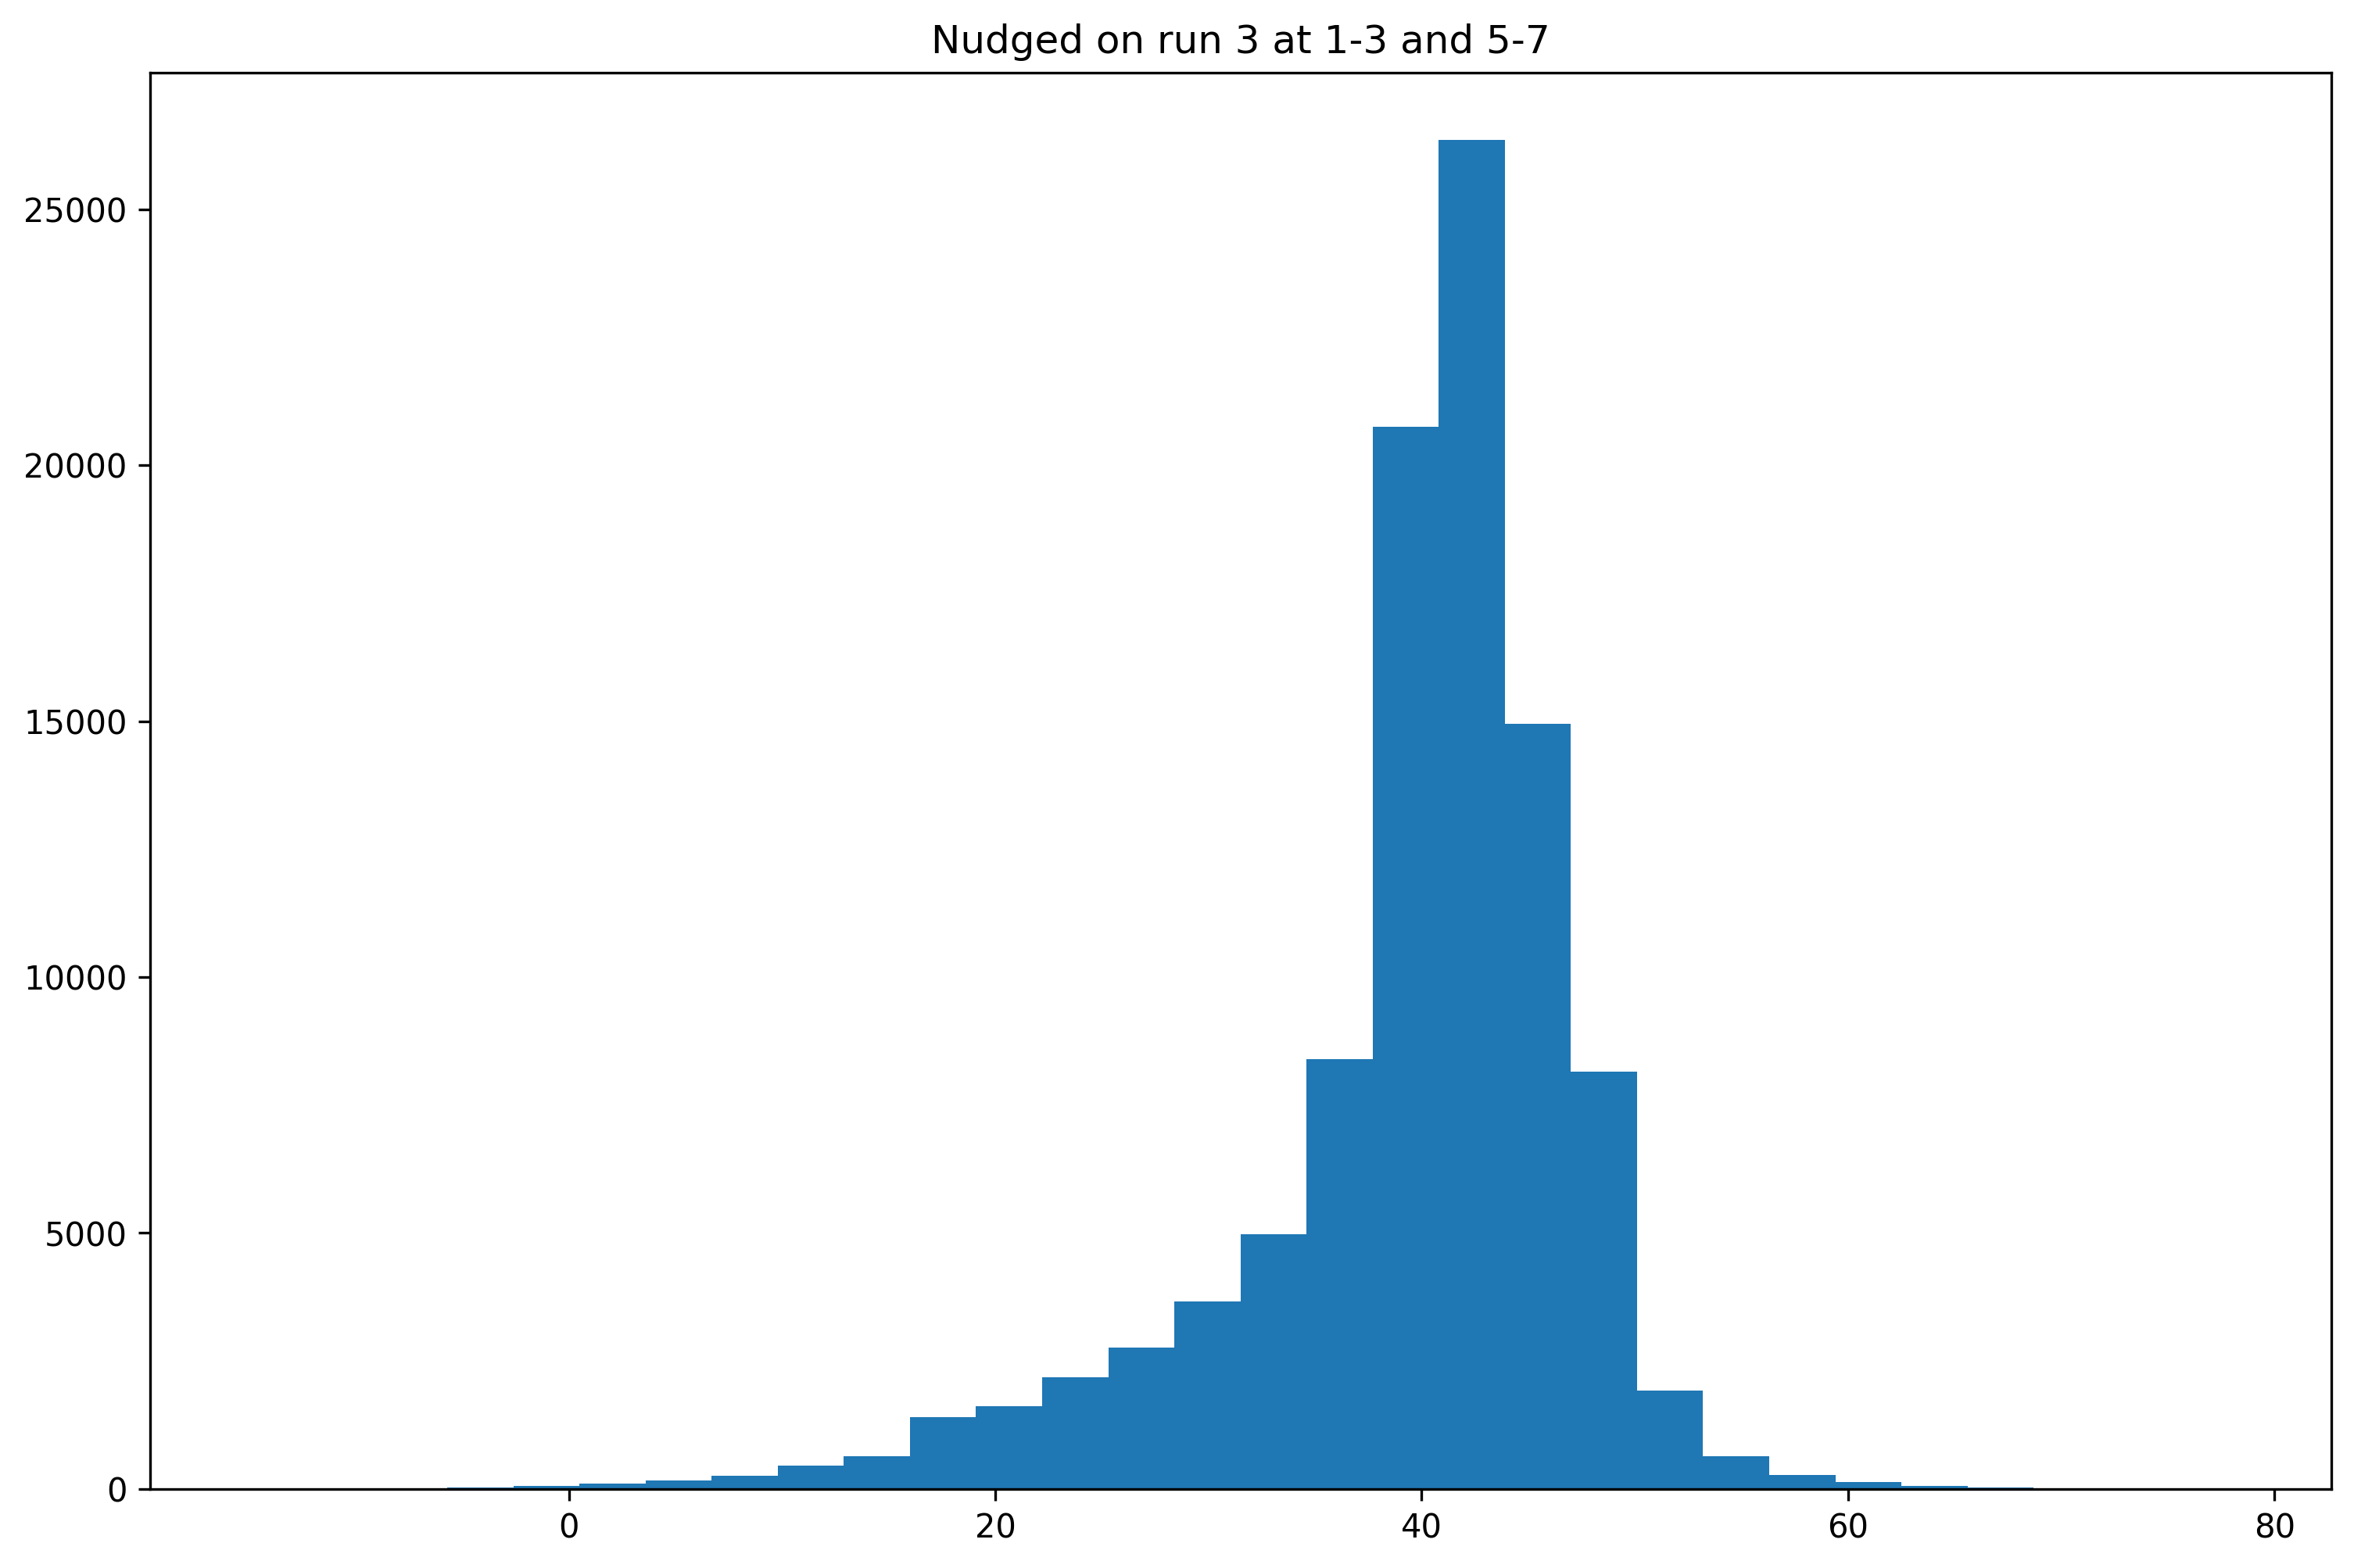

In [25]:
plot_hist(nudged1, r'Nudged on run 3 at 1-3 and 5-7')

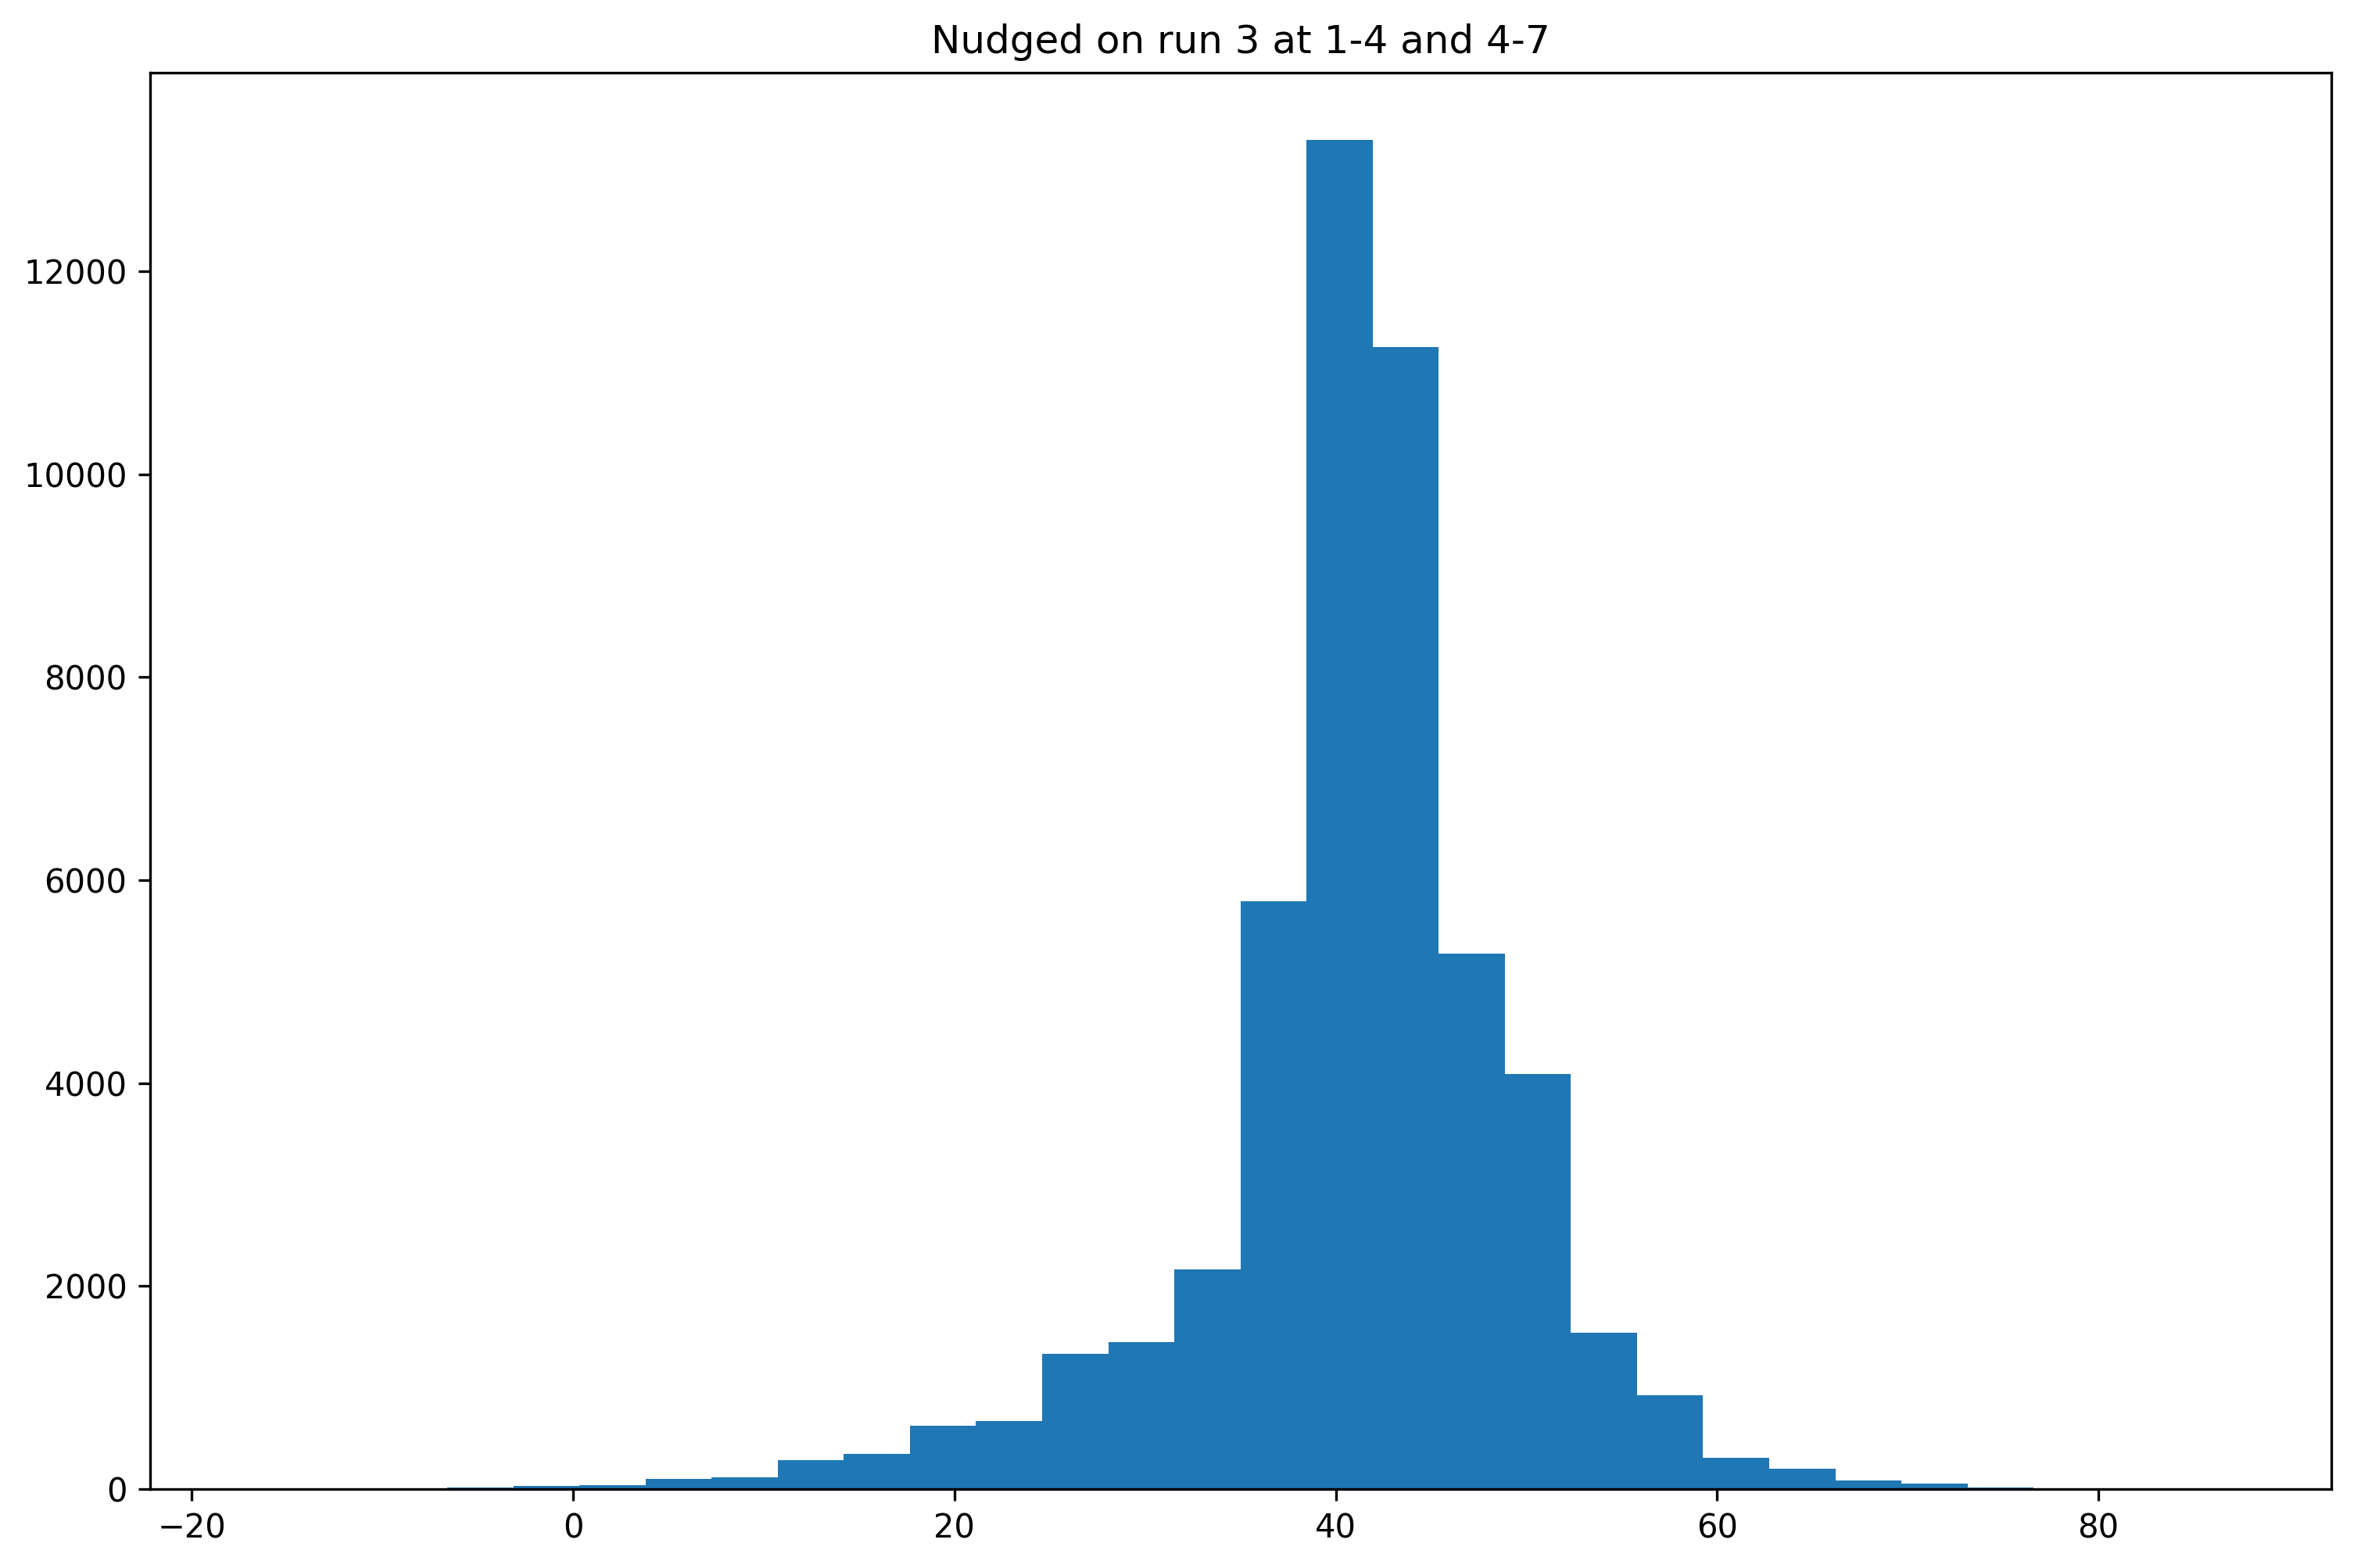

In [9]:
plot_hist(nudged2, r'Nudged on run 3 at 1-4 and 4-7')

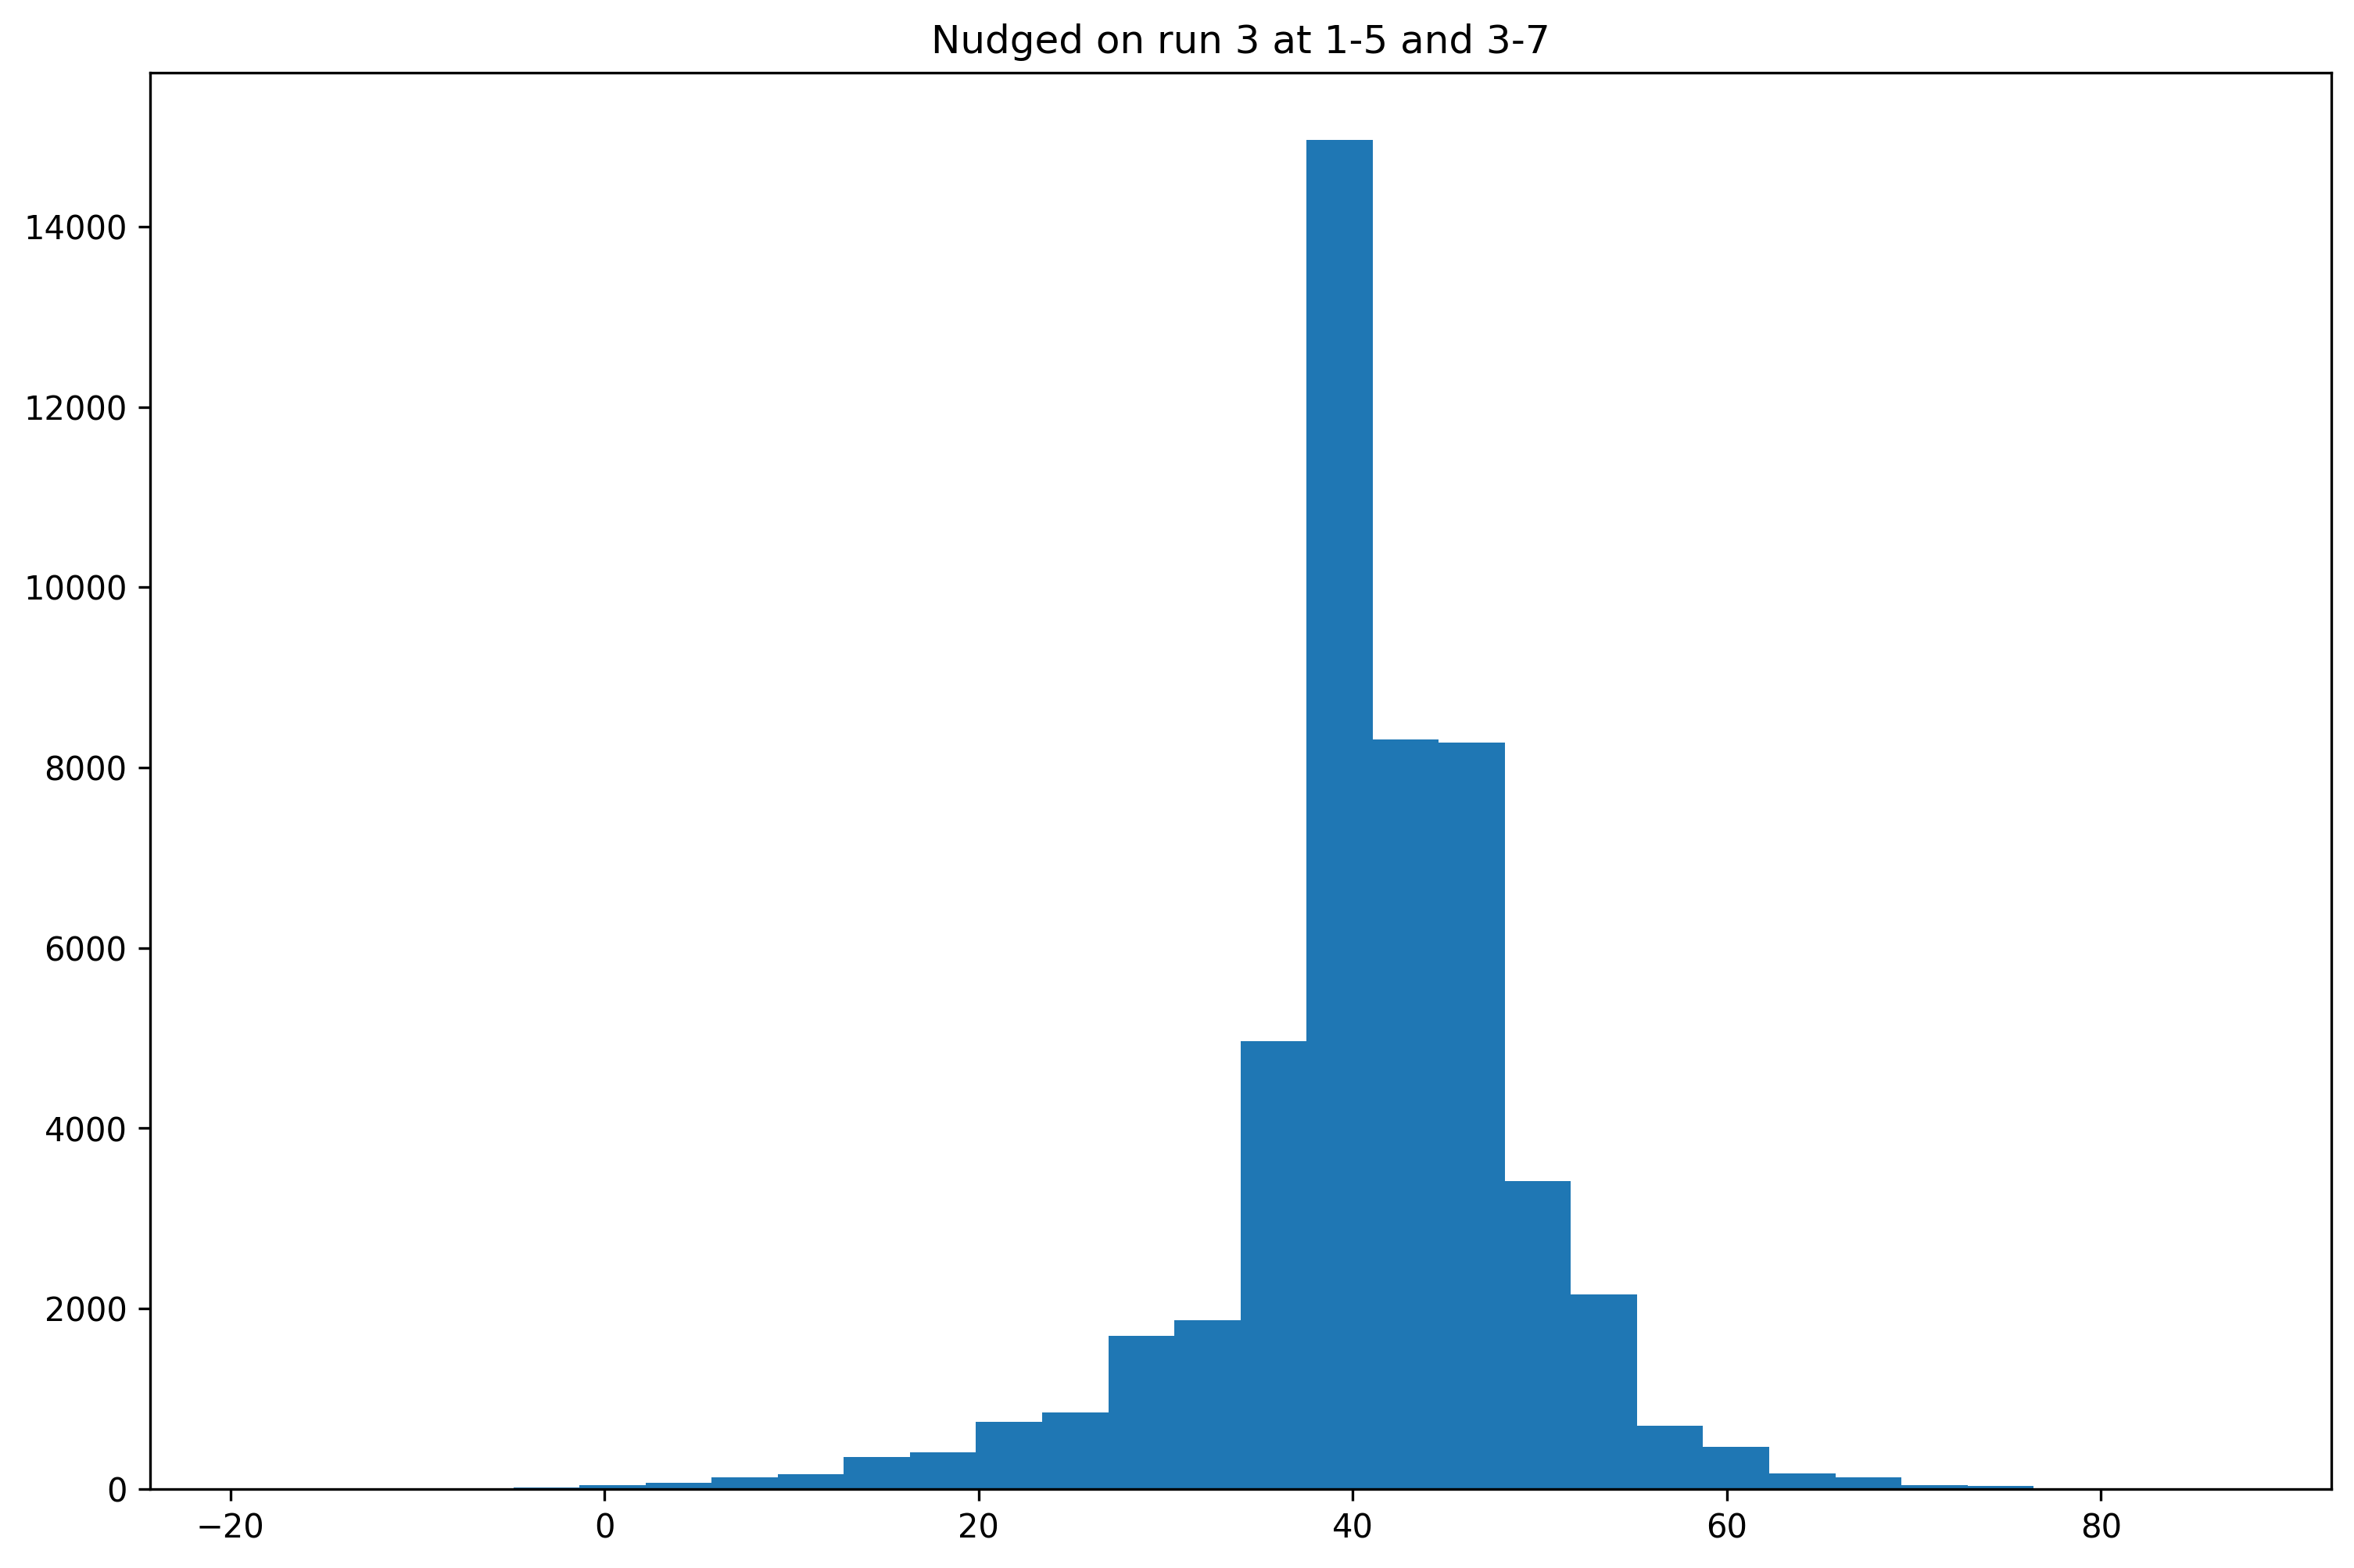

In [10]:
plot_hist(nudged3, r'Nudged on run 3 at 1-5 and 3-7')

So clearly overlapping the ranges doesn't really help us much, what about including zero?

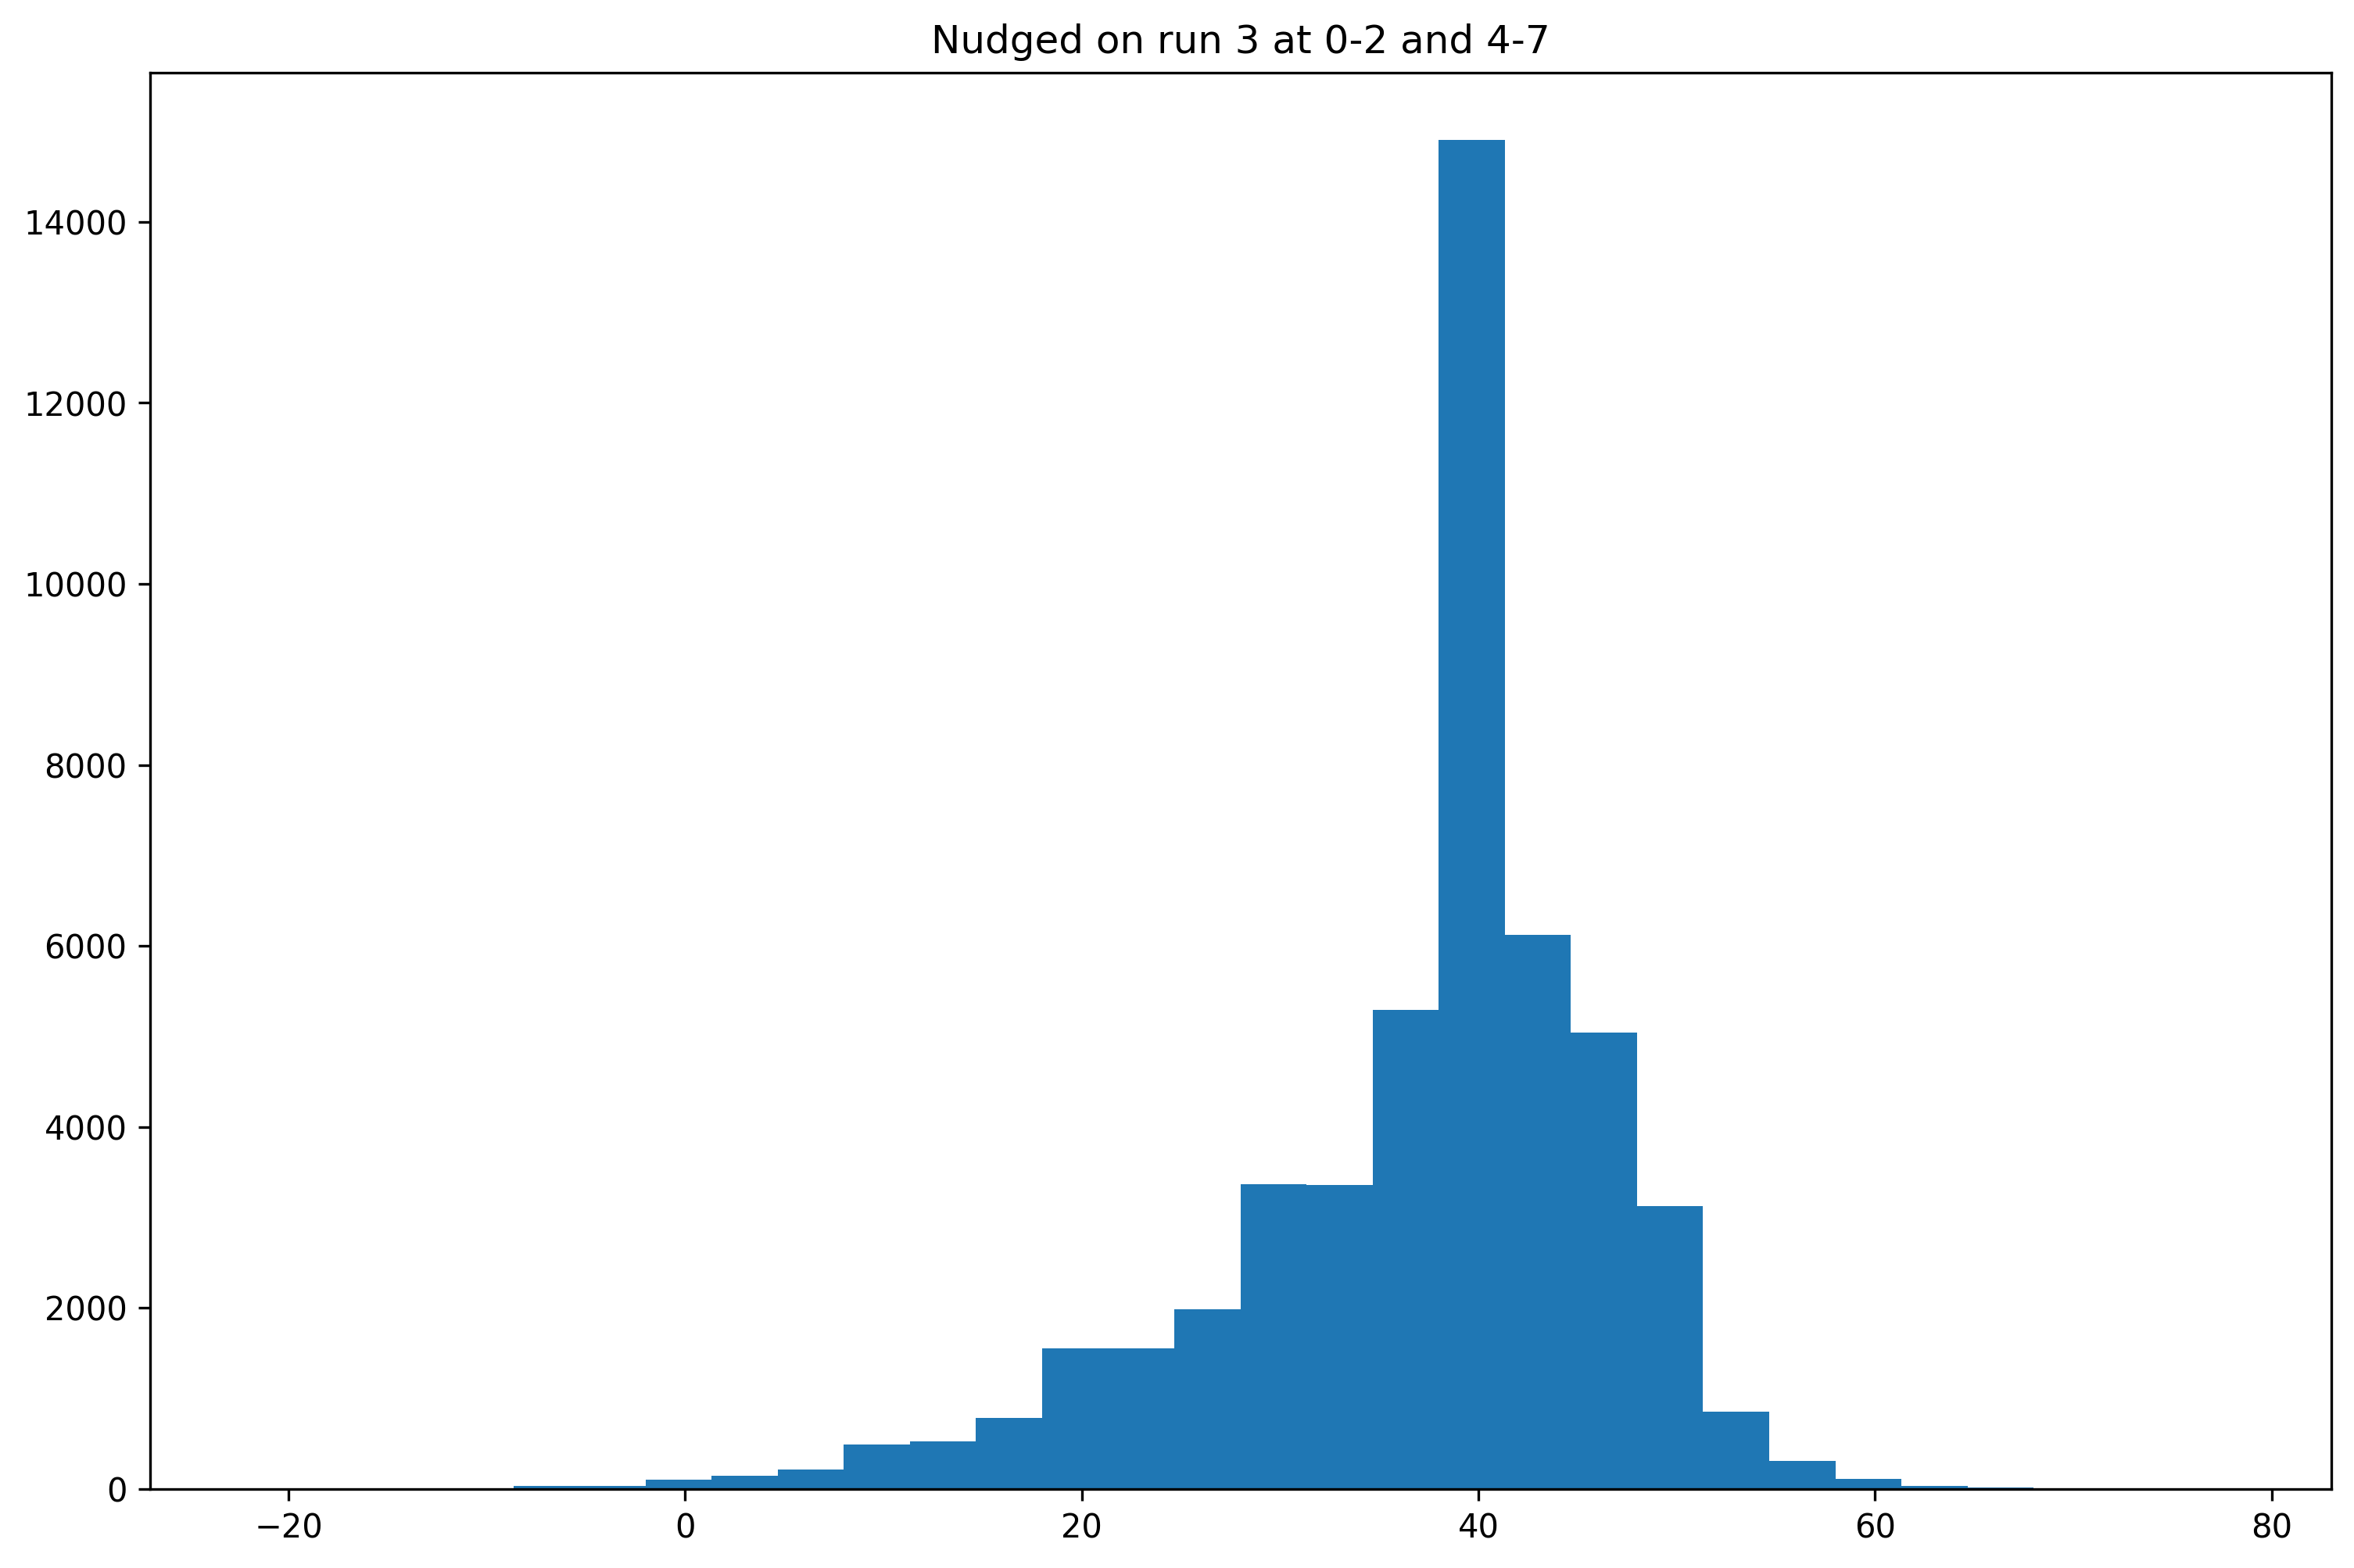

In [11]:
plot_hist(nudged_zero, r'Nudged on run 3 at 0-2 and 4-7')

Nope, that doesn't help much.

# Now what if the staircases don't hit 66%

In my testing so far, they get pretty close and seem to stay within a few percentage points. But let's pretend it gets really bad.

Fake up some data if the participant only succeeds at 56%, and then also some where they are SUPERHUMAN and hit 76%.

In [12]:
stable_loss = [simulate_task(0.56, stable_rewards, goal) for i in range(0, 50000)]
nudged_loss = [simulate_task(0.56, range_rewards_2, goal, nudge_run=3) for i in range(0, 50000)]
meganudged_loss = [simulate_task(0.56, range_rewards_3, goal, nudge_run=3) for i in range(0, 50000)]
nudge_zero_loss = [simulate_task(0.56, range_rewards_zero, goal, nudge_run=3) for i in range(0, 50000)]

stable_win = [simulate_task(0.76, stable_rewards, goal) for i in range(0, 50000)]
nudged_win = [simulate_task(0.76, range_rewards_2, goal, nudge_run=3) for i in range(0, 50000)]
meganudged_win = [simulate_task(0.76, range_rewards_3, goal, nudge_run=3) for i in range(0, 50000)]
nudge_zero_win = [simulate_task(0.76, range_rewards_zero, goal, nudge_run=3) for i in range(0, 50000)]

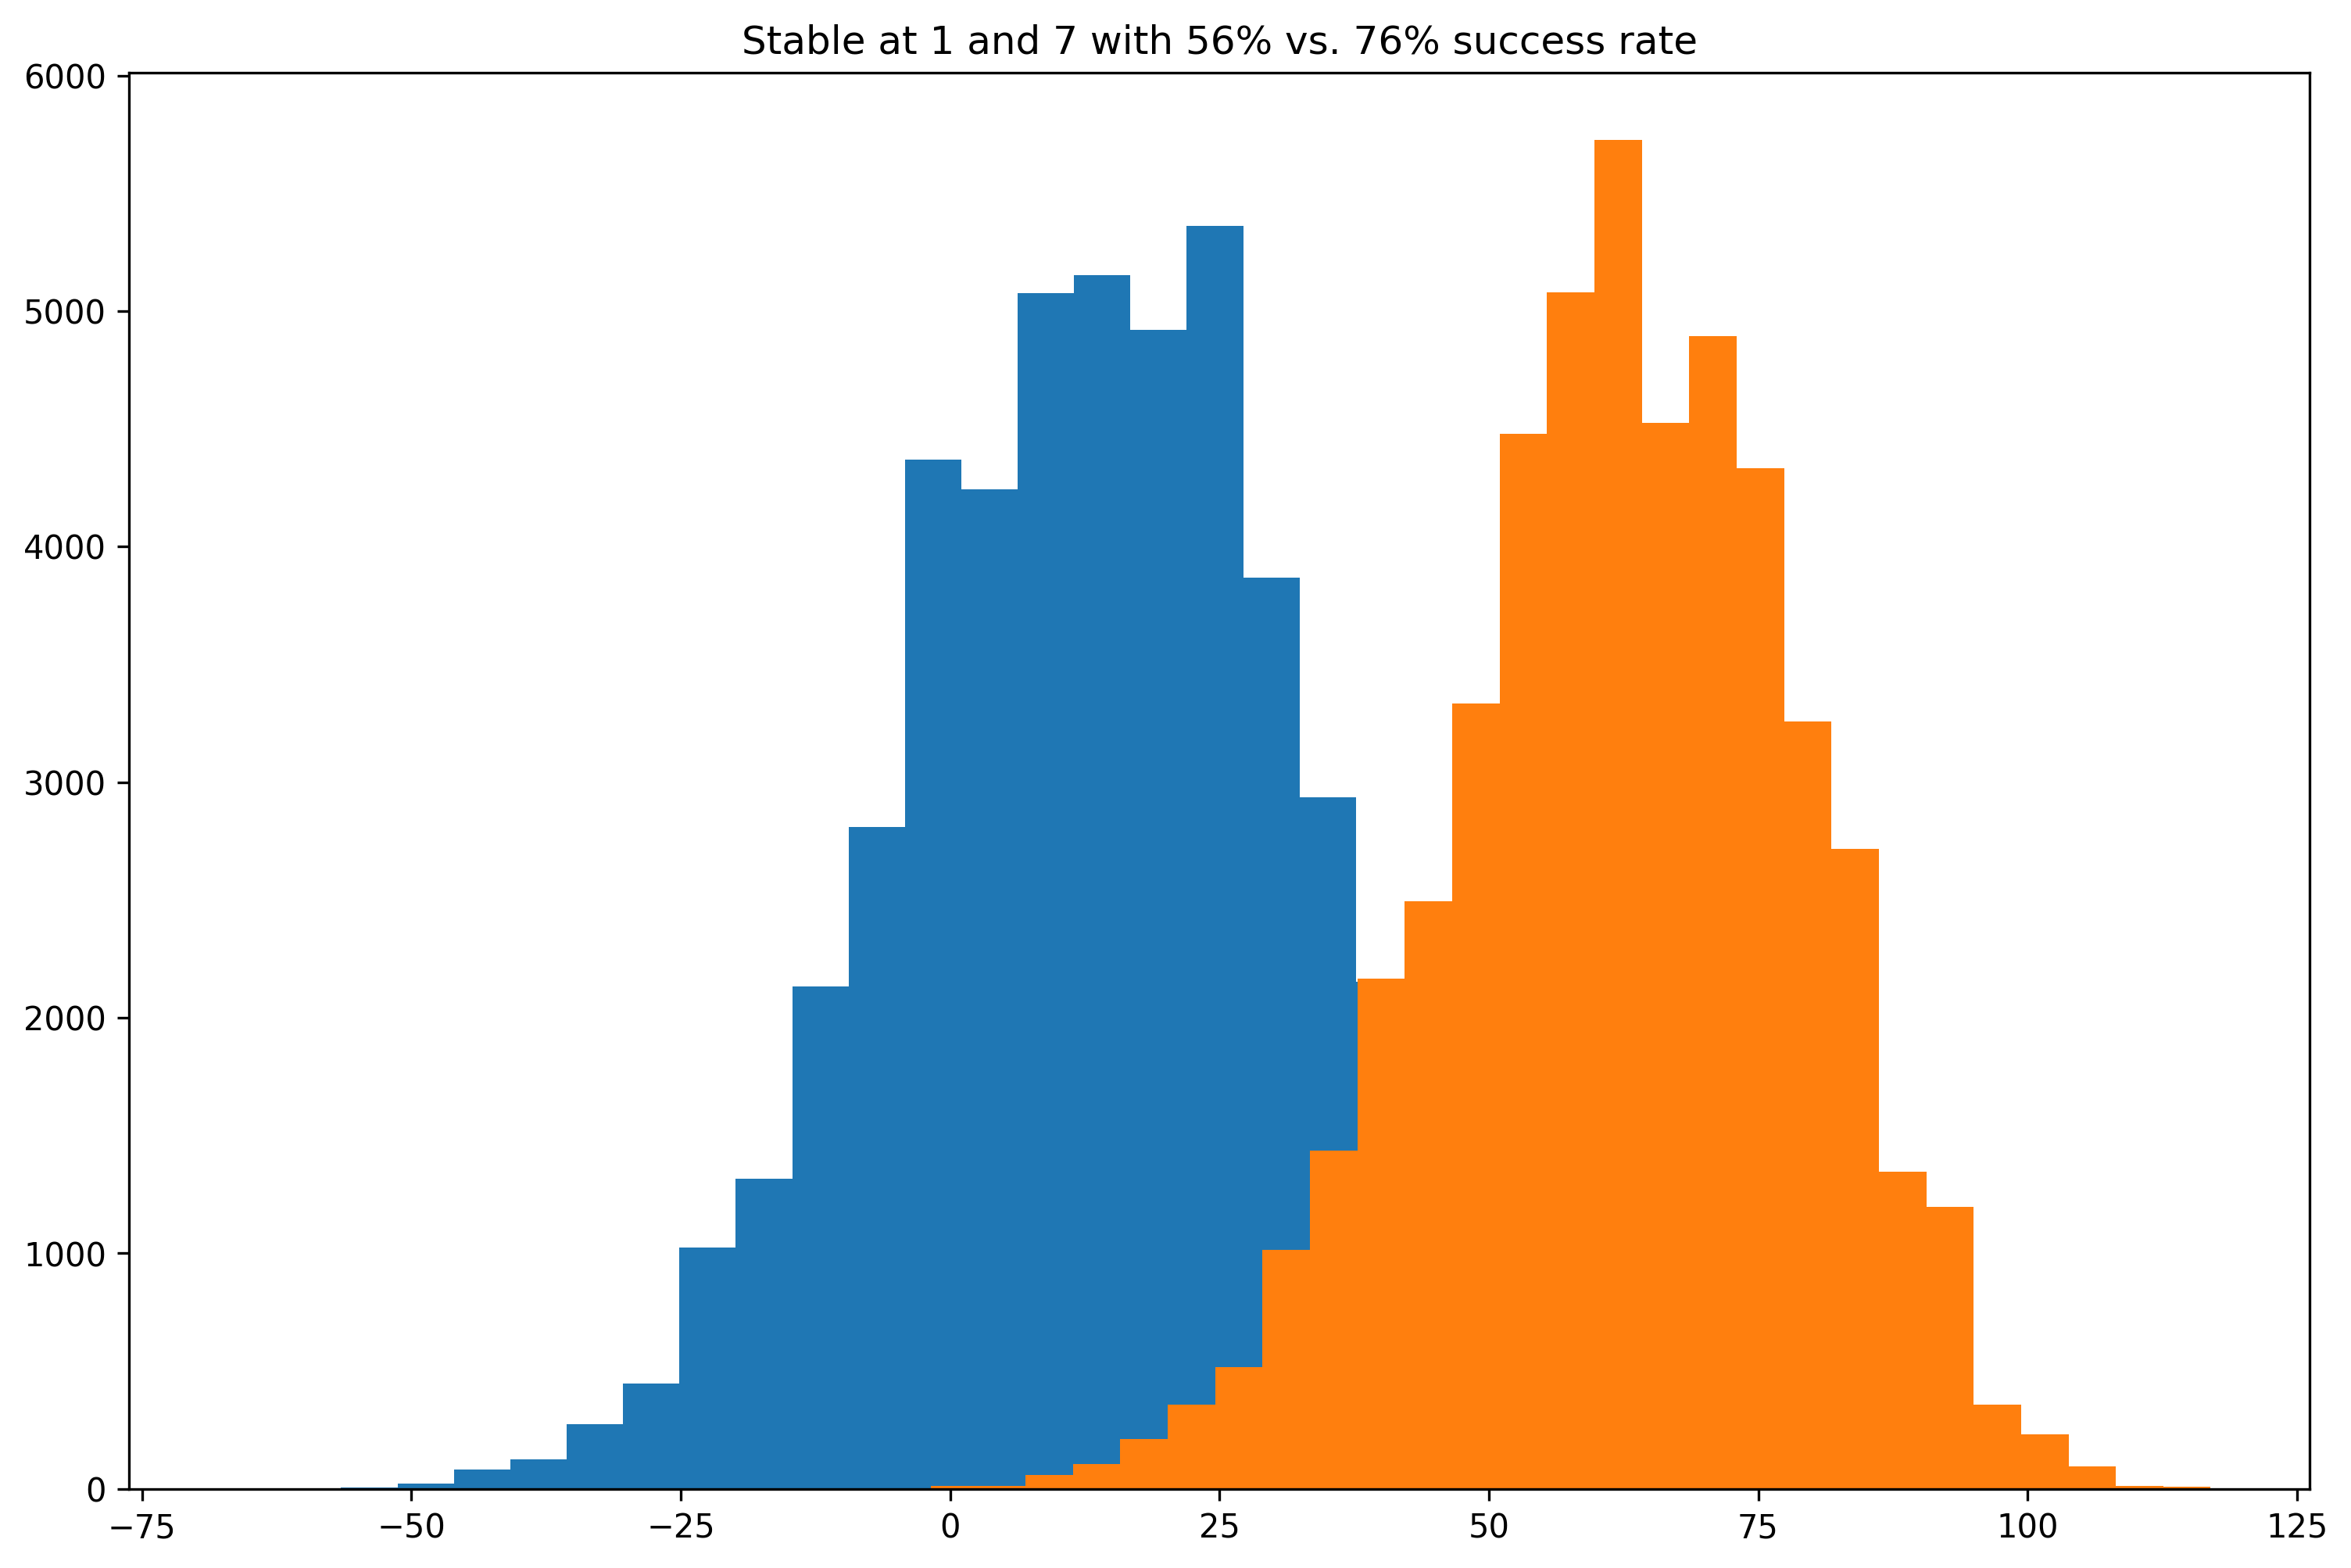

In [13]:
plot_hist(stable_loss)
plot_hist(stable_win, r'Stable at 1 and 7 with 56% vs. 76% success rate')

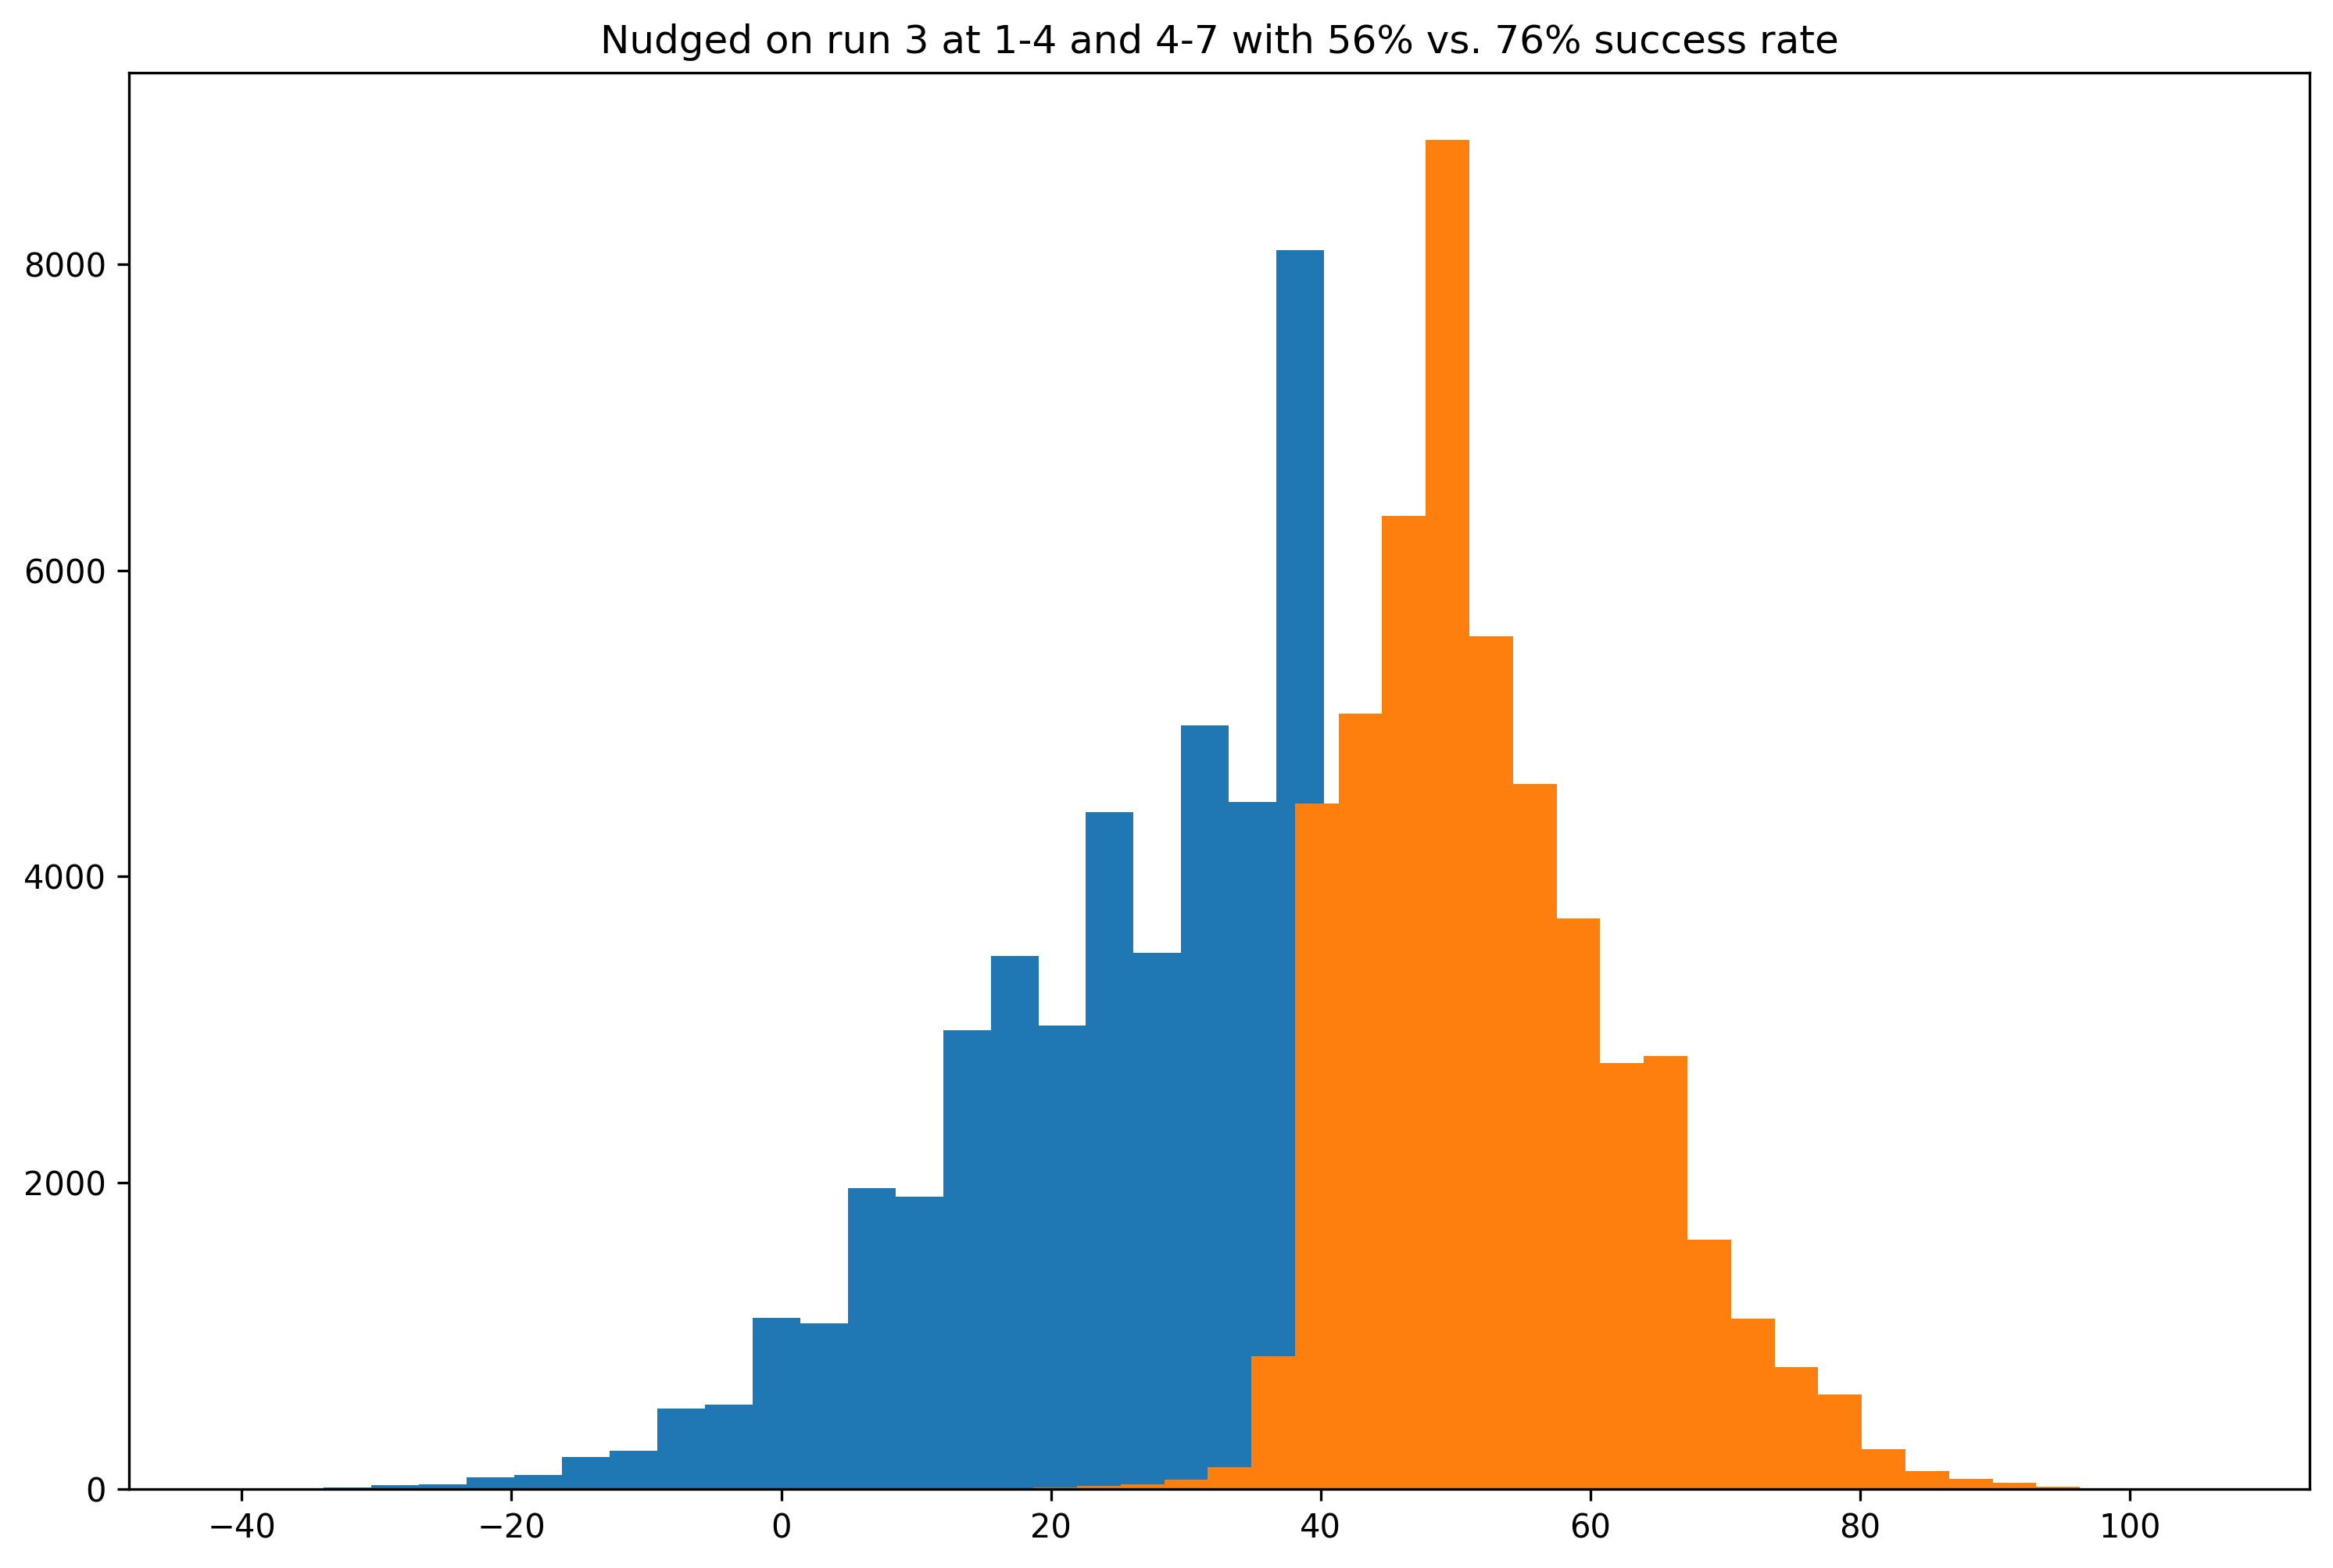

In [14]:
plot_hist(nudged_loss)
plot_hist(nudged_win, r'Nudged on run 3 at 1-4 and 4-7 with 56% vs. 76% success rate')

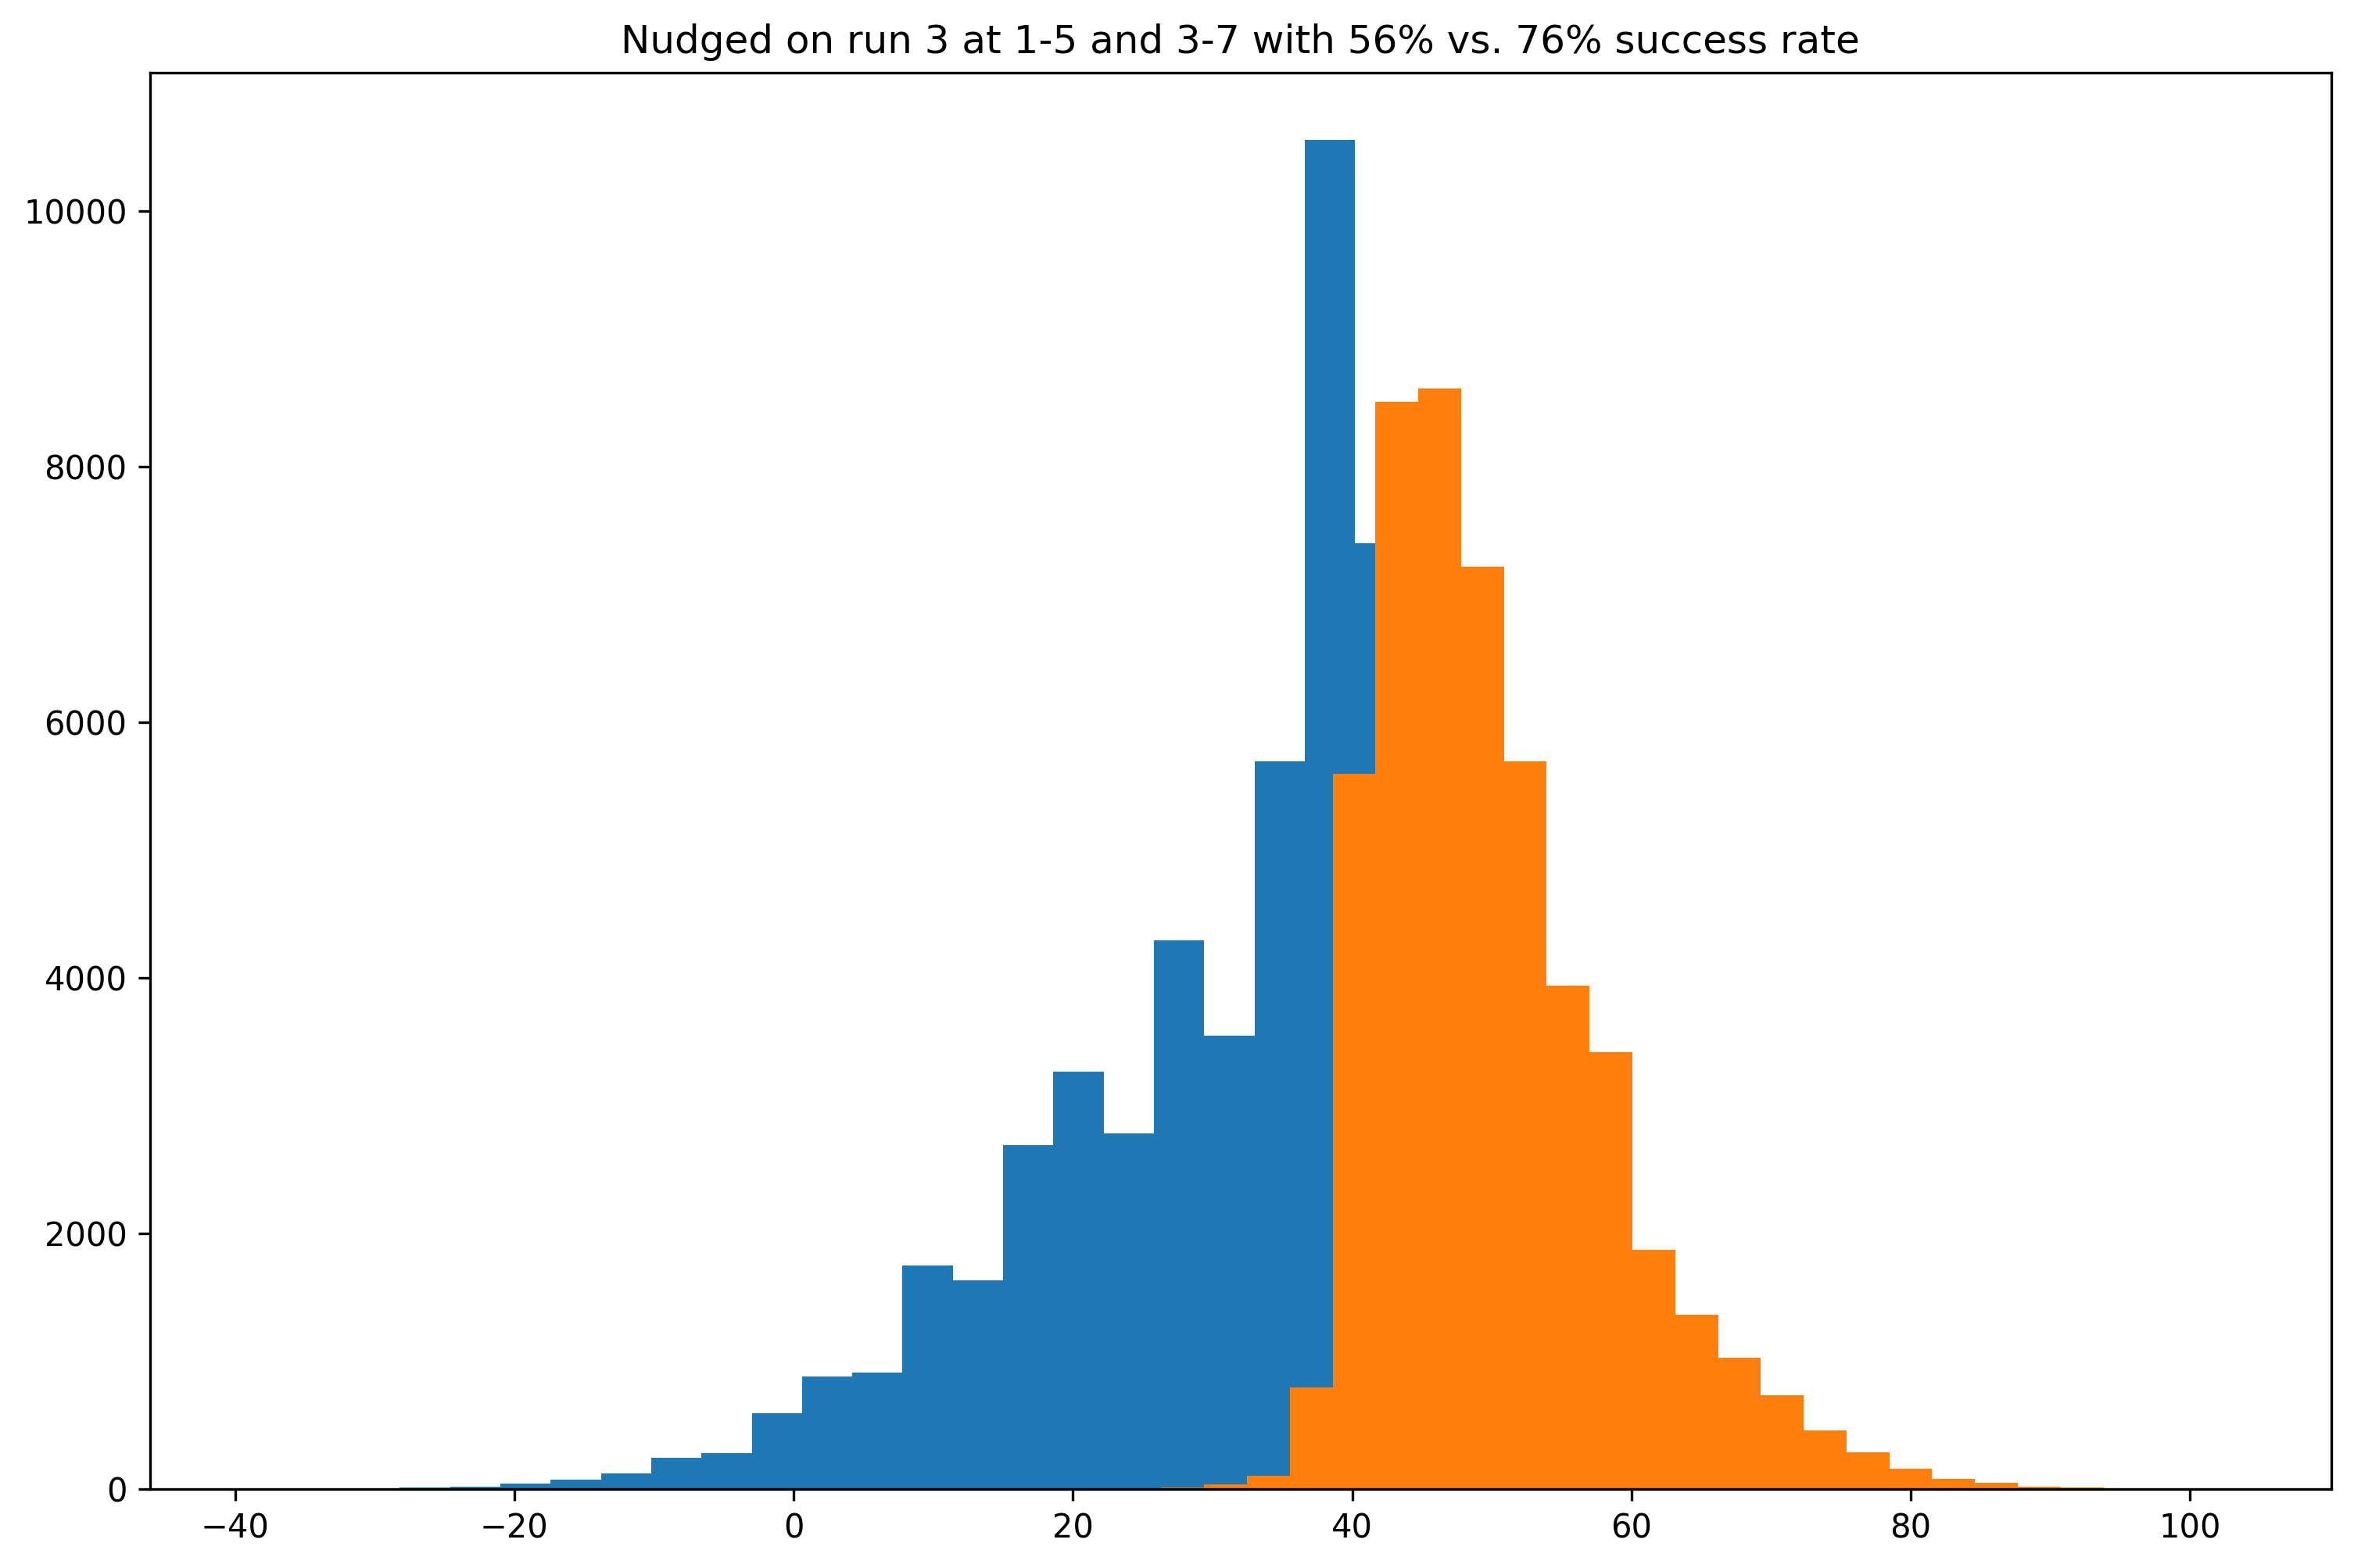

In [15]:
plot_hist(meganudged_loss)
plot_hist(meganudged_win, r'Nudged on run 3 at 1-5 and 3-7 with 56% vs. 76% success rate')

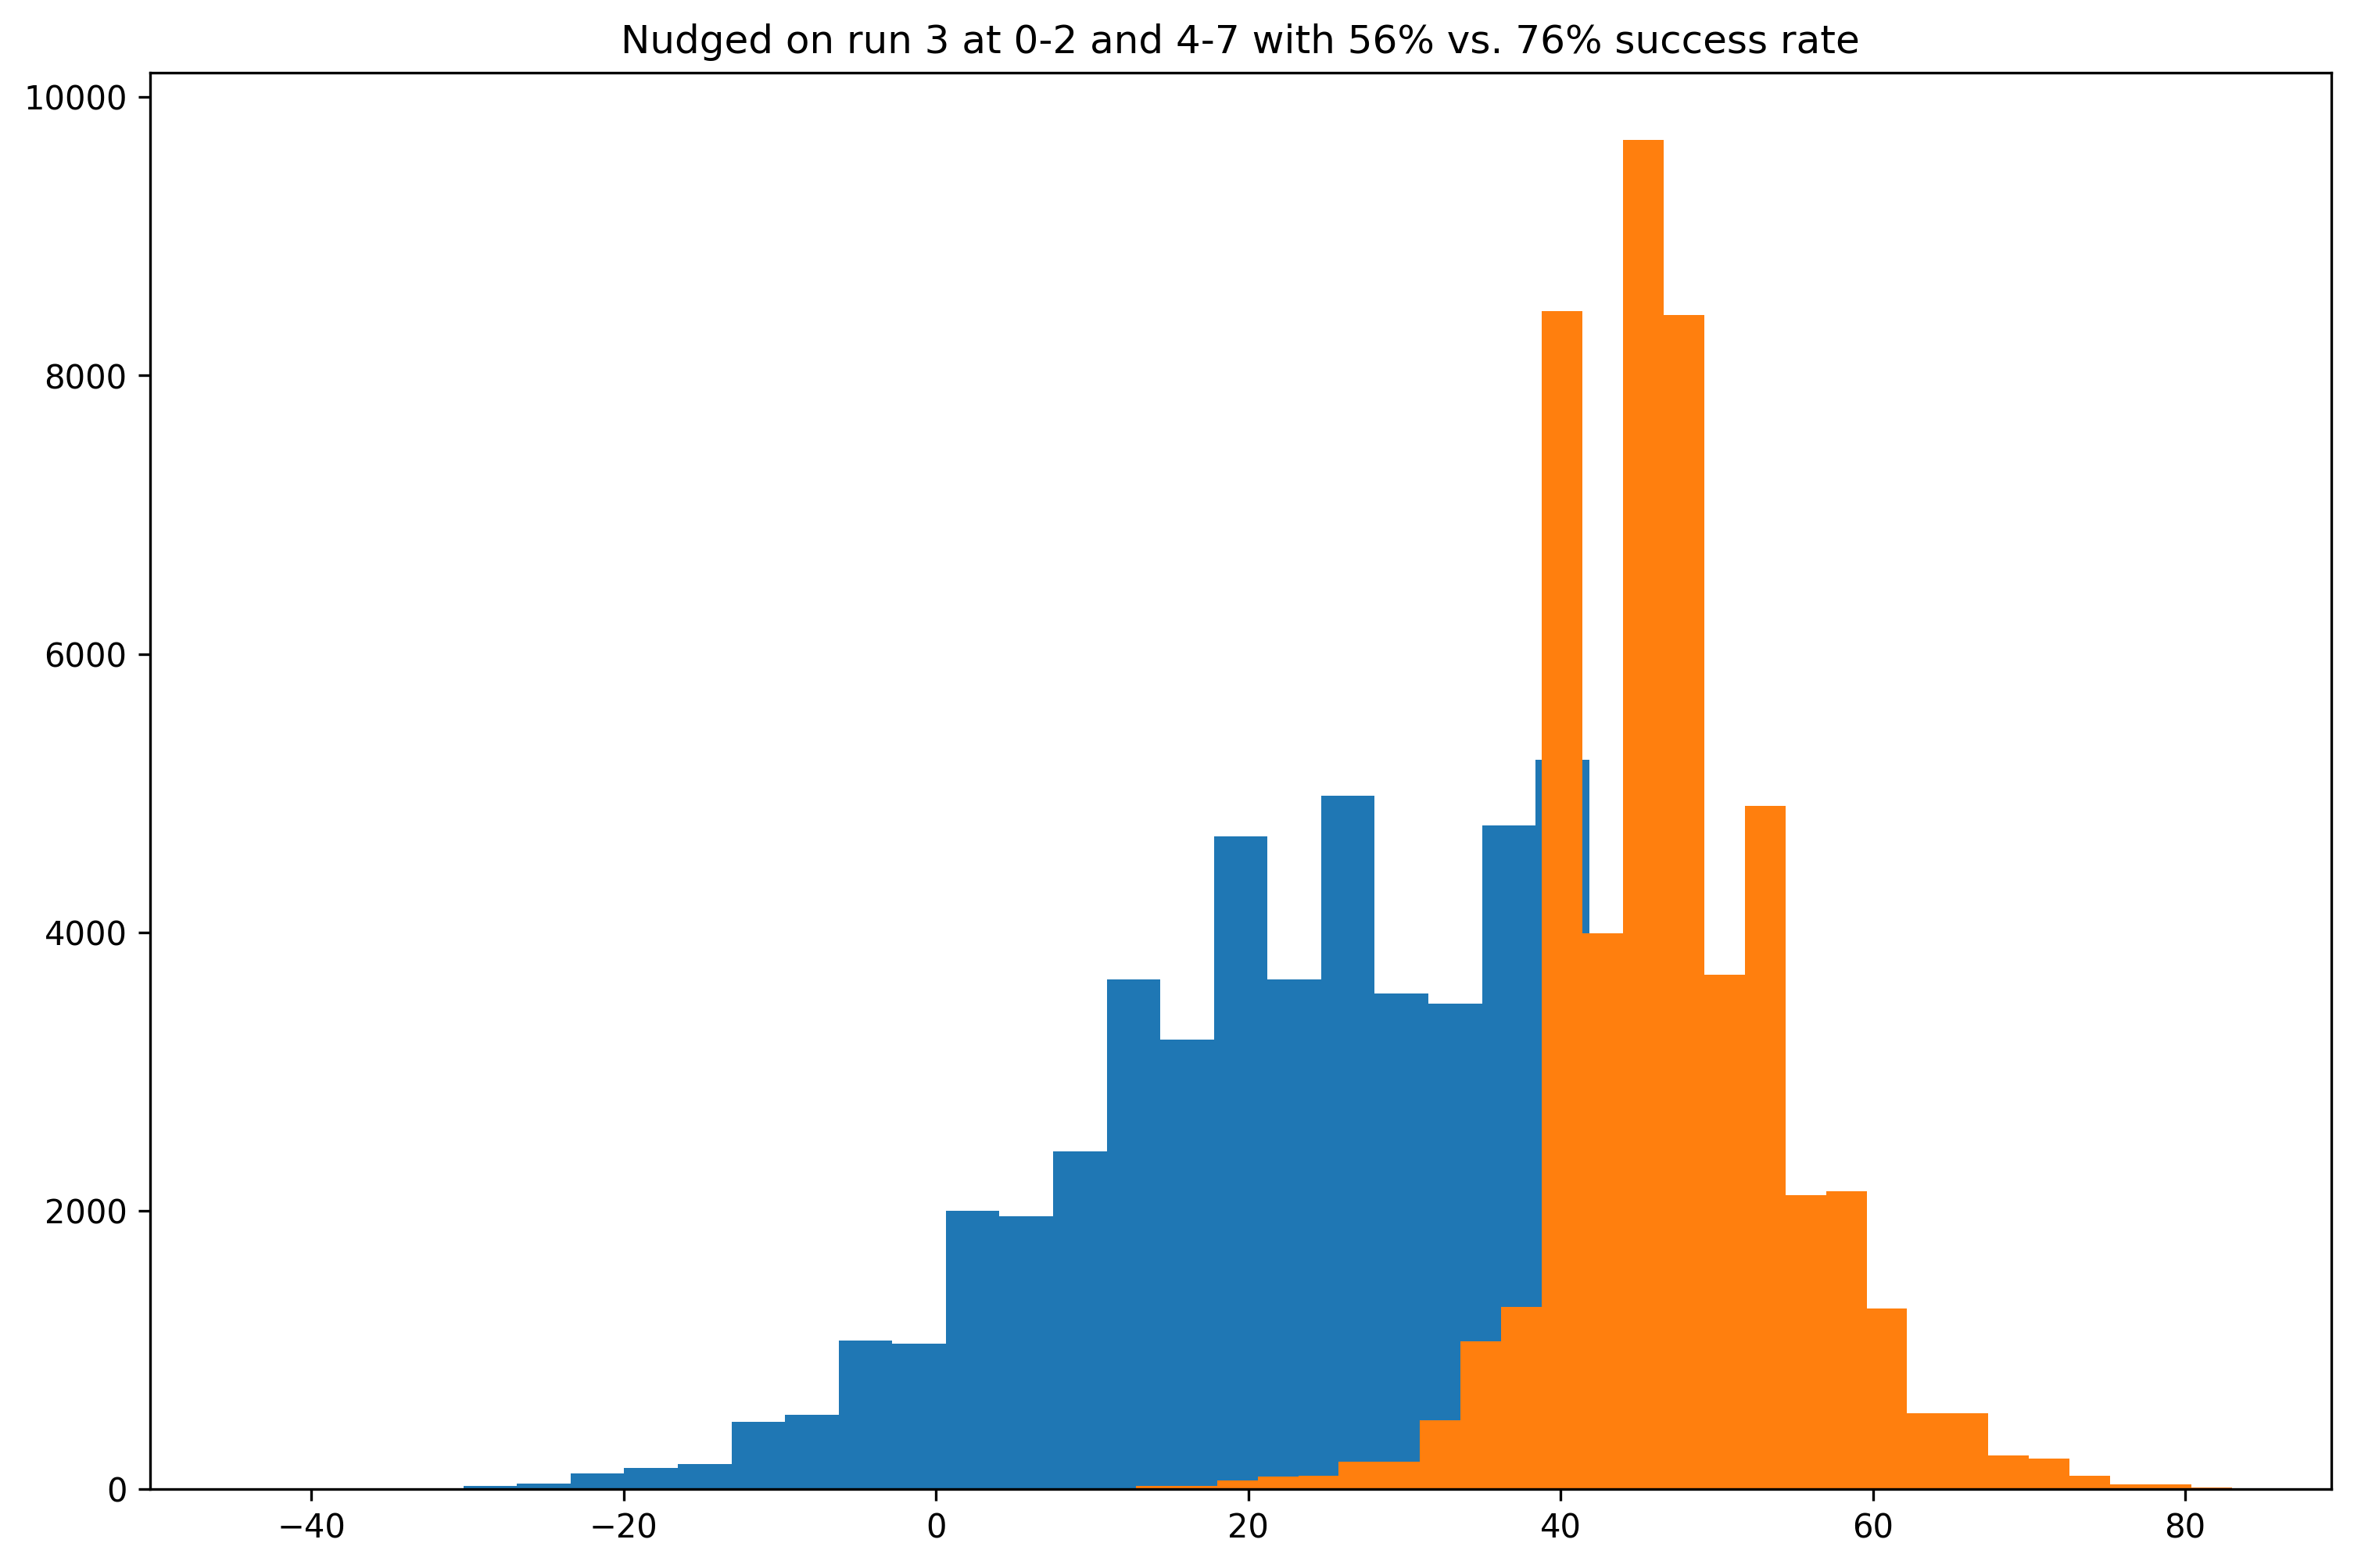

In [16]:
plot_hist(nudge_zero_loss)
plot_hist(nudge_zero_win, r'Nudged on run 3 at 0-2 and 4-7 with 56% vs. 76% success rate')